## 1. Data Loading and Initial Preparation

In this section, the dataset is loaded and prepared for analysis.  
The following preprocessing steps are performed:

- Loading the dataset from CSV file
- Removing unnecessary index columns
- Converting date columns to datetime format
- Initial inspection of column names and sample records

This step ensures that the dataset is correctly structured for time-based aggregation and further exploratory analysis.

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd

In [ ]:
df = pd.read_csv('bikes_data.csv').drop('Unnamed: 0', axis=1)

### Dataset Overview

Here we inspect:
- Column names
- First records of the dataset
- General structure of the data

This allows us to understand available variables and identify potential issues such as incorrect formats or missing values.

In [ ]:
df.columns

Index(['order_id', 'customer_id', 'order_status', 'order_date',
       'required_date', 'shipped_date', 'store_id', 'staff_id', 'first_name',
       'last_name', 'phone', 'email', 'street', 'city', 'state', 'zip_code',
       'item_id', 'product_id', 'quantity', 'list_price', 'discount'],
      dtype='object')

In [ ]:
df.head(100)

order_id  customer_id  order_status  order_date required_date  \
0          1          259             4  2016-01-01    2016-01-03   
1          1          259             4  2016-01-01    2016-01-03   
2          1          259             4  2016-01-01    2016-01-03   
3          1          259             4  2016-01-01    2016-01-03   
4          1          259             4  2016-01-01    2016-01-03   
..       ...          ...           ...         ...           ...   
95        32         1259             4  2016-01-21    2016-01-24   
96        32         1259             4  2016-01-21    2016-01-24   
97        32         1259             4  2016-01-21    2016-01-24   
98        33          236             4  2016-01-21    2016-01-22   
99        33          236             4  2016-01-21    2016-01-22   

   shipped_date  store_id  staff_id first_name  last_name  ...  \
0    2016-01-03         1         2  Johnathan  Velazquez  ...   
1    2016-01-03         1         2  Johnathan  Velazquez  ...   
2    2016-01-03         1         2  Johnathan  Velazquez  ...   
3    2016-01-03         1         2  Johnathan  Velazquez  ...   
4    2016-01-03         1         2  Johnathan  Velazquez  ...   
..          ...       ...       ...        ...        ...  ...   
95   2016-01-22         1         3    Kimbery     Nieves  ...   
96   2016-01-22         1         3    Kimbery     Nieves  ...   
97   2016-01-22         1         3    Kimbery     Nieves  ...   
98   2016-01-22         2         6     Verona    O'neill  ...   
99   2016-01-22         2         6     Verona    O'neill  ...   

                              email                    street        city  \
0   johnathan.velazquez@hotmail.com  9680 E. Somerset Street   Pleasanton   
1   johnathan.velazquez@hotmail.com  9680 E. Somerset Street   Pleasanton   
2   johnathan.velazquez@hotmail.com  9680 E. Somerset Street   Pleasanton   
3   johnathan.velazquez@hotmail.com  9680 E. Somerset Street   Pleasanton   
4   johnathan.velazquez@hotmail.com  9680 E. Somerset Street   Pleasanton   
..                              ...                       ...         ...   
95           kimbery.nieves@msn.com       768 Roehampton St.   San Carlos   
96           kimbery.nieves@msn.com       768 Roehampton St.   San Carlos   
97           kimbery.nieves@msn.com       768 Roehampton St.   San Carlos   
98       verona.o'neill@hotmail.com       8279 W. Sussex St.       Selden   
99       verona.o'neill@hotmail.com       8279 W. Sussex St.       Selden   

   state zip_code  item_id  product_id  quantity  list_price  discount  
0     CA    94566        1          20         1      599.99      0.20  
1     CA    94566        2           8         2     1799.99      0.07  
2     CA    94566        3          10         2     1549.00      0.05  
3     CA    94566        4          16         2      599.99      0.05  
4     CA    94566        5           4         1     2899.99      0.20  
..   ...      ...      ...         ...       ...         ...       ...  
95    CA    94070        1           8         2     1799.99      0.07  
96    CA    94070        2          12         2      549.99      0.07  
97    CA    94070        3          25         2      499.99      0.10  
98    NY    11784        1          23         2      299.99      0.07  
99    NY    11784        2           7         1     3999.99      0.10  

[100 rows x 21 columns]

In [ ]:
df['order_date']=pd.to_datetime(df['order_date'], format='%Y-%m-%d')
df['required_date']=pd.to_datetime(df['required_date'], format='%Y-%m-%d')
df['shipped_date']=pd.to_datetime(df['shipped_date'], format='%Y-%m-%d')

## 2. Exploratory Visualizations

This section focuses on exploring the dataset using different visualization libraries:

- Matplotlib
- Seaborn
- Plotly

The goal is to analyze trends, seasonality, store performance, and ordering patterns across cities and time.

### Orders by City

This visualization presents the number of orders per city.  
It helps identify geographic distribution of demand and potential key markets.

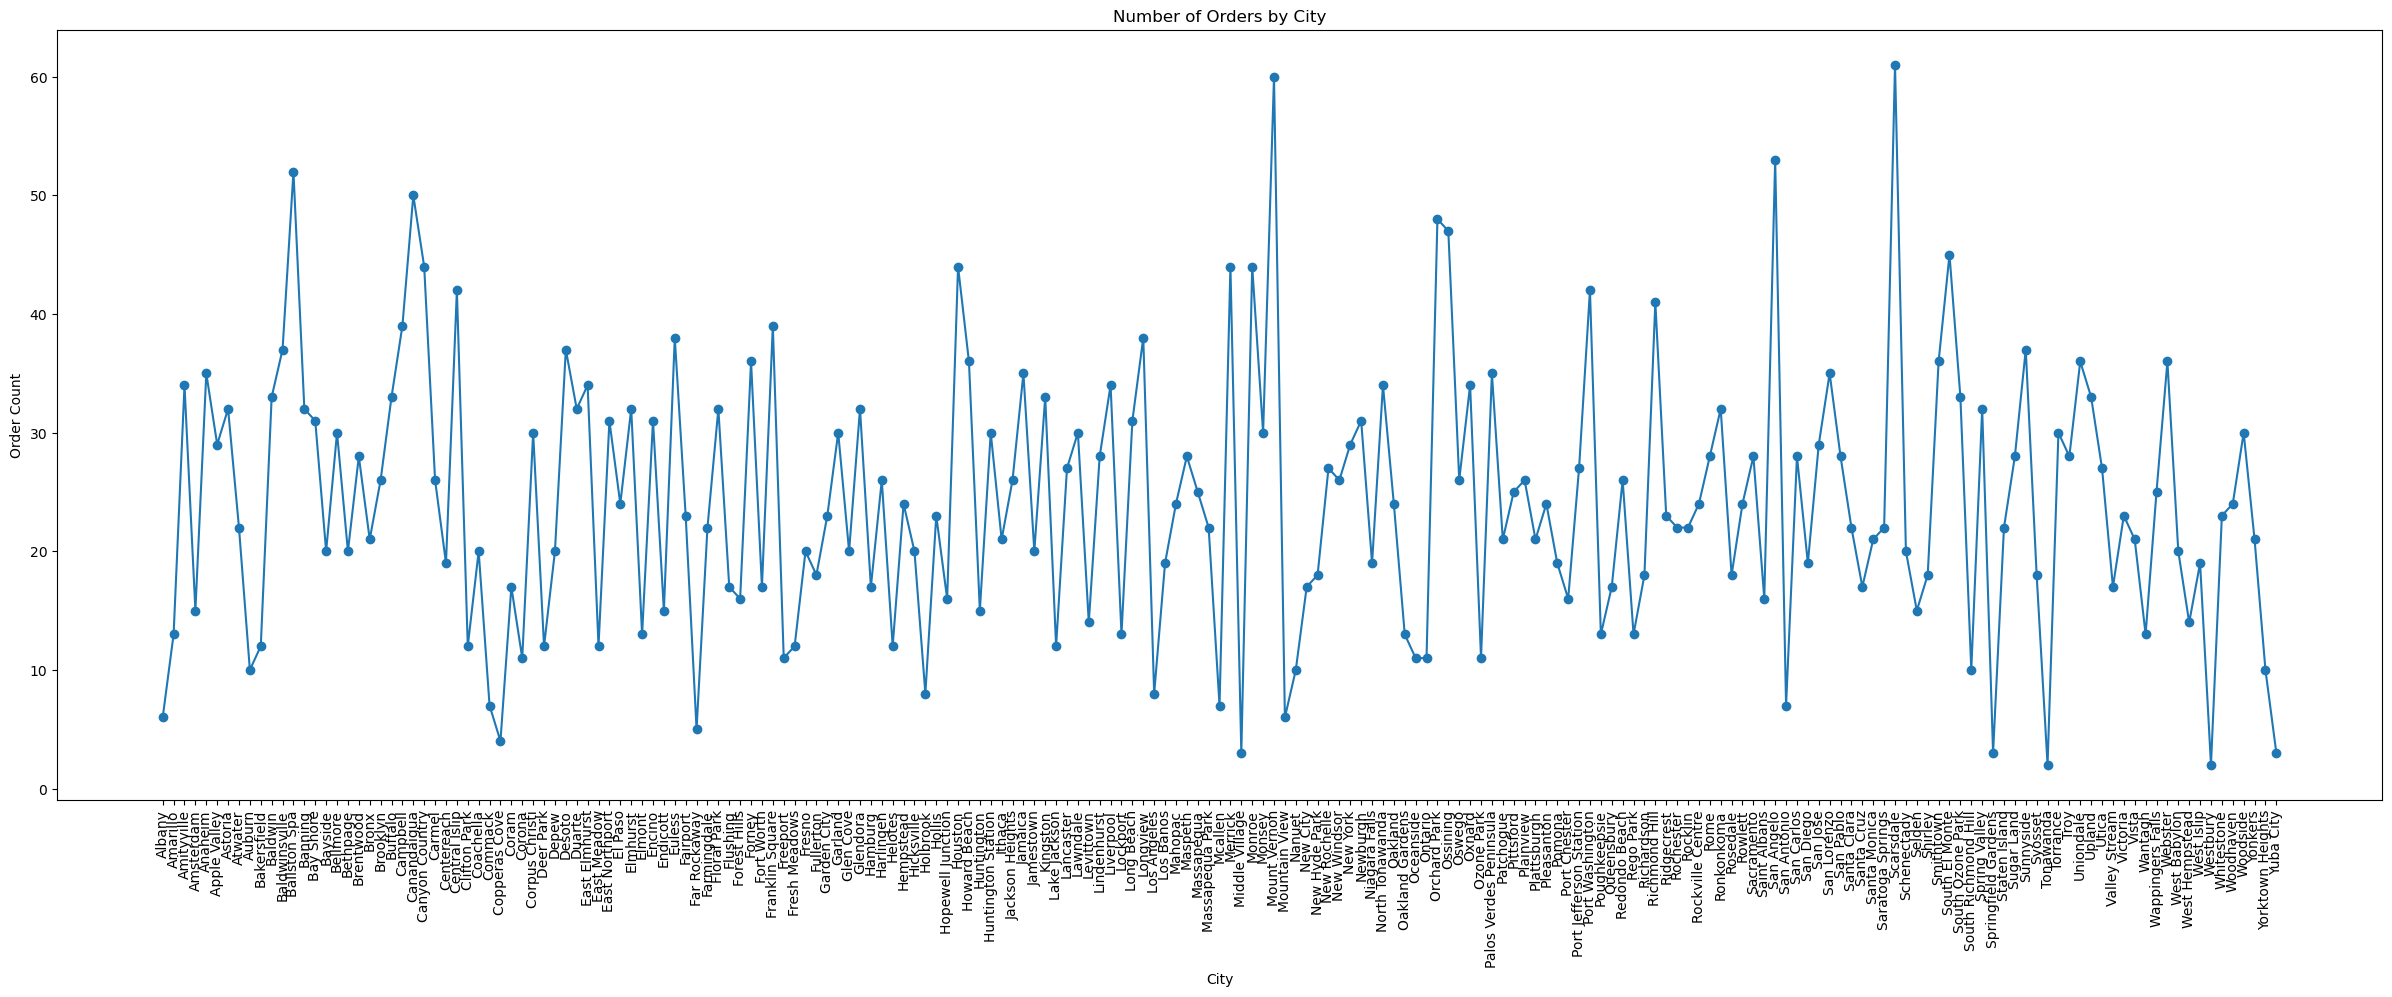

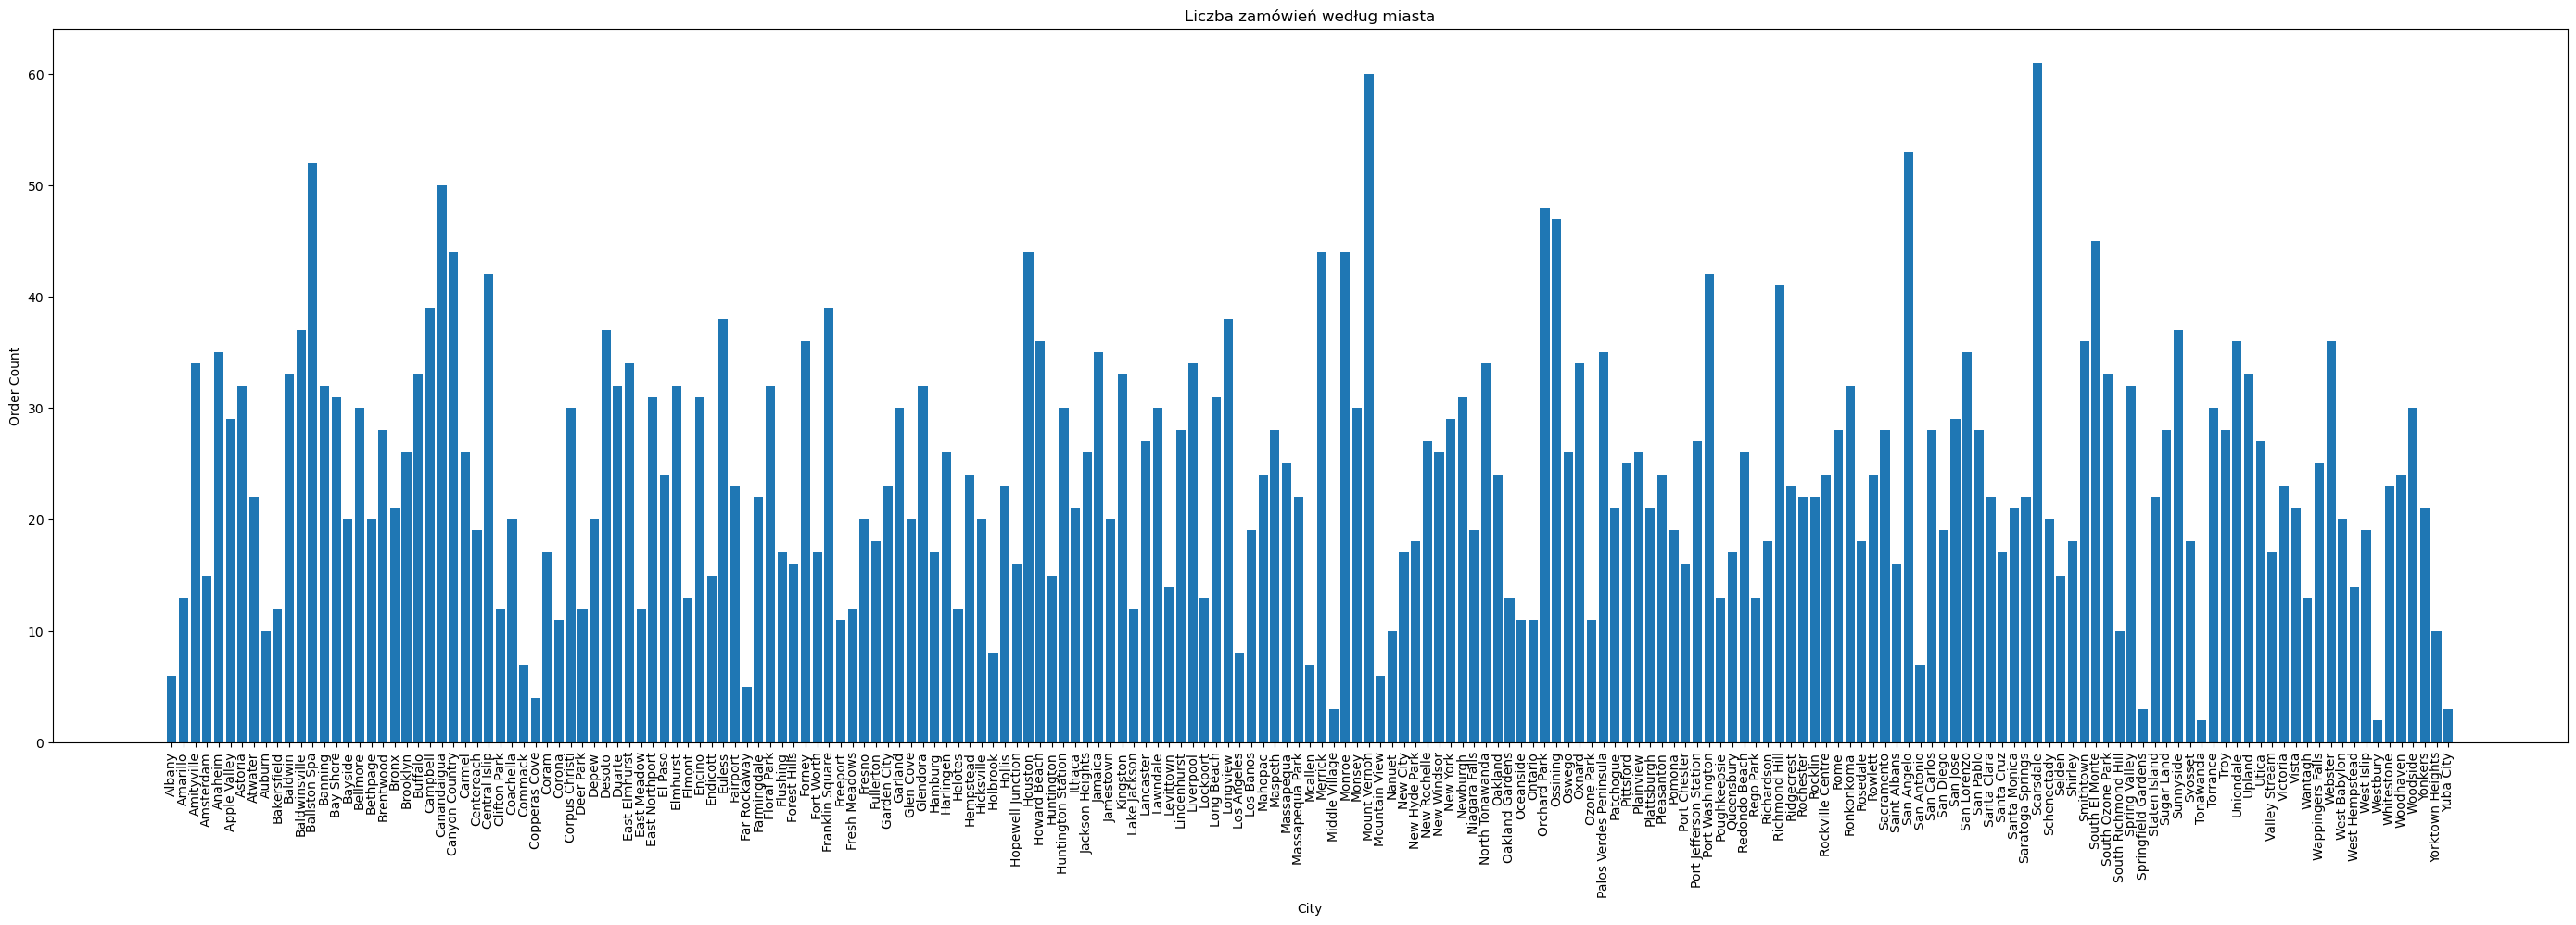

In [ ]:
df_grouped_city = df.groupby('city').agg({'order_id': 'count'}).reset_index()

plt.subplots(figsize=(30,10))
plt.plot(df_grouped_city['city'], df_grouped_city['order_id'], marker='o')
plt.ylabel('Order Count')
plt.xlabel('City')
plt.title('Liczba zamówień według miasta')
plt.xticks(rotation=90)
plt.show()

plt.subplots(figsize=(35,10))
plt.bar(x=df_grouped_city['city'], height=df_grouped_city['order_id'])
plt.ylabel('Order Count')
plt.xlabel('City')
plt.title('Liczba zamówień według miasta')
plt.xticks(rotation=90)
plt.show()

### Total Quantity Over Time

The following plot shows total ordered quantity aggregated by order date.

This allows identification of:
- Trends
- Seasonality
- Possible spikes or anomalies

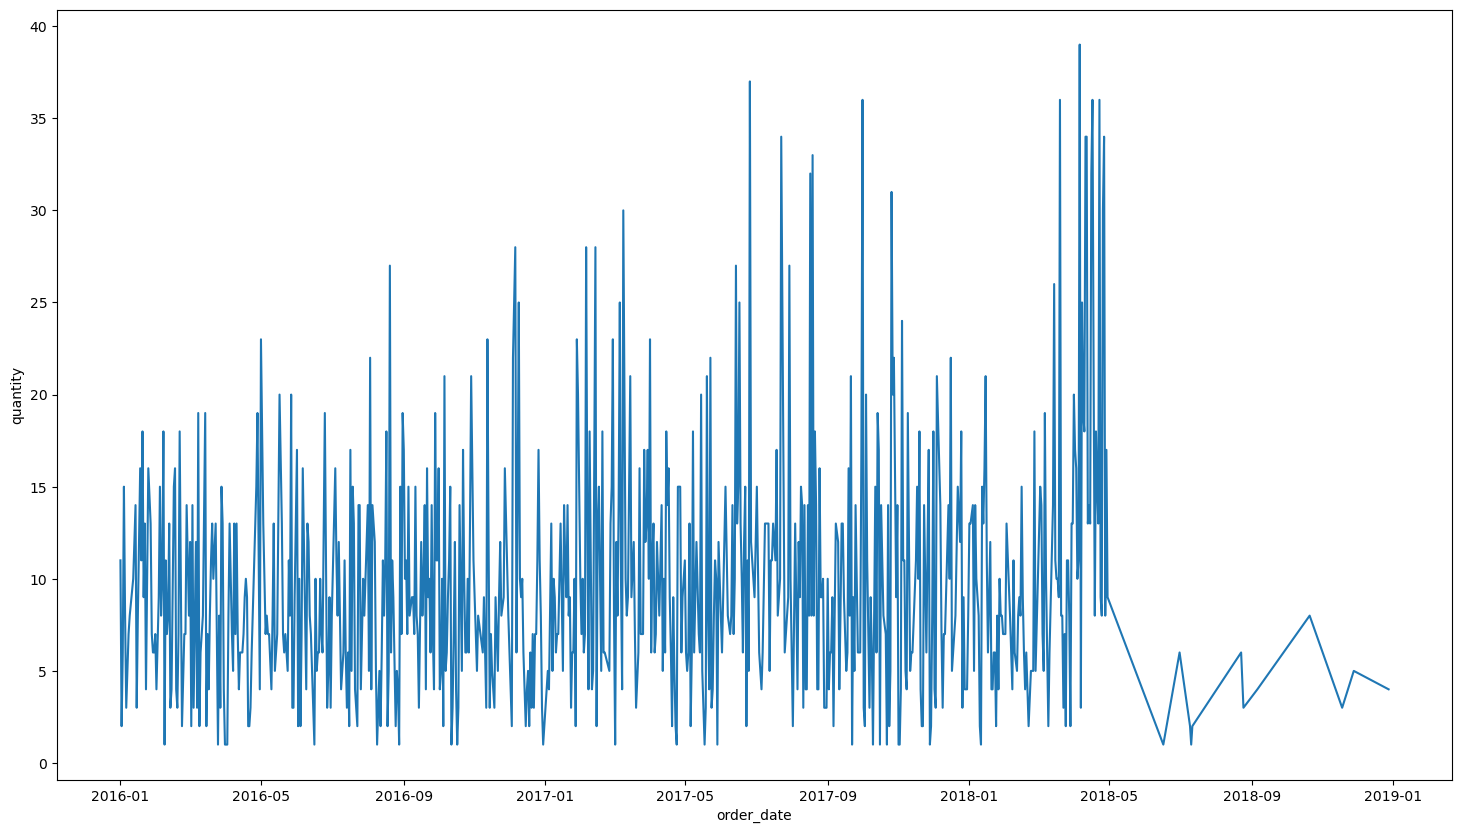

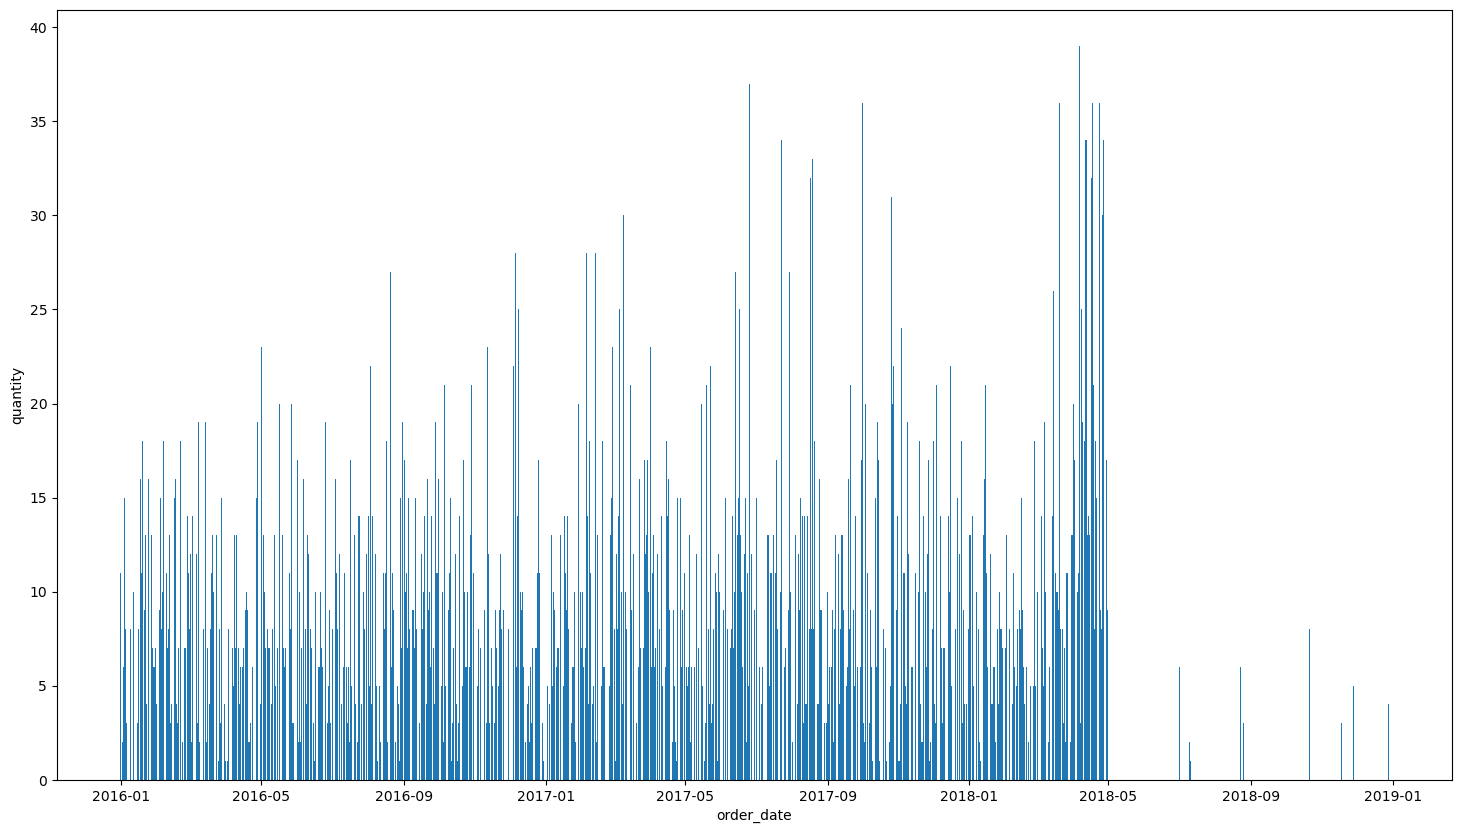

In [17]:
df_grouped = df.groupby('order_date').agg({'quantity':'sum'}).reset_index()

import matplotlib.pyplot as plt

plt.subplots(figsize=(18,10))
plt.plot(df_grouped['order_date'],
        df_grouped['quantity'])
plt.ylabel('quantity')
plt.xlabel('order_date')
plt.show()

plt.subplots(figsize=(18,10))
plt.bar(x=df_grouped['order_date'],
        height=df_grouped['quantity'])
plt.ylabel('quantity')
plt.xlabel('order_date')
plt.show()

### Average Price by Store and Month

A heatmap is used to visualize average list price per store across time (year-month).

This helps detect:
- Store-level pricing strategies
- Seasonal pricing effects
- Structural differences between stores

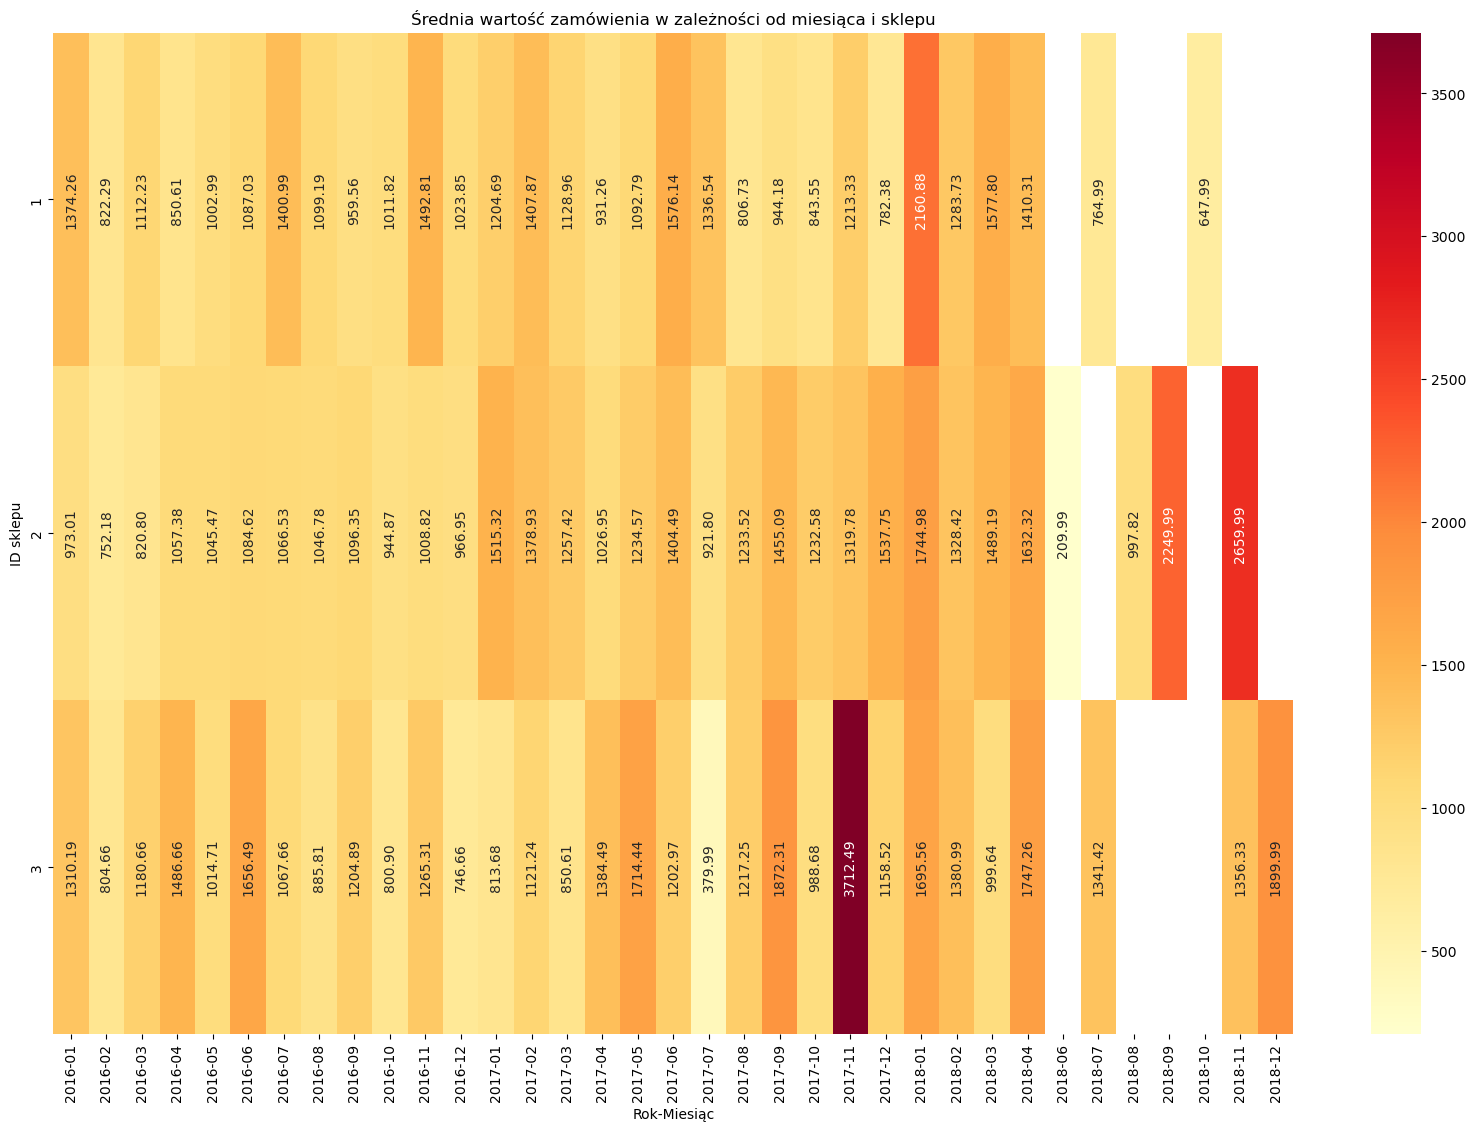

In [ ]:
df['year_month']=df['order_date'].apply(lambda x: x.strftime('%Y-%m'))
df_grouped_store_month = df.groupby(['store_id', 'year_month']).agg({'list_price': 'mean'}).reset_index()

plt.subplots(figsize=(20,13))
sns.heatmap(df_grouped_store_month.pivot_table(index='store_id', columns='year_month', values='list_price', aggfunc='mean'),
           annot=True, cmap='YlOrRd', fmt='.2f', annot_kws={"rotation": 90})

plt.title("Średnia wartość zamówienia w zależności od miesiąca i sklepu")
plt.ylabel("ID sklepu")
plt.xlabel("Rok-Miesiąc")
plt.show()

### Sales Intensity by Day of Week and Month

This heatmap shows aggregated quantity across weekdays and months.

It helps identify:
- Weekly seasonality
- Strong/weak sales periods
- Behavioral purchasing patterns

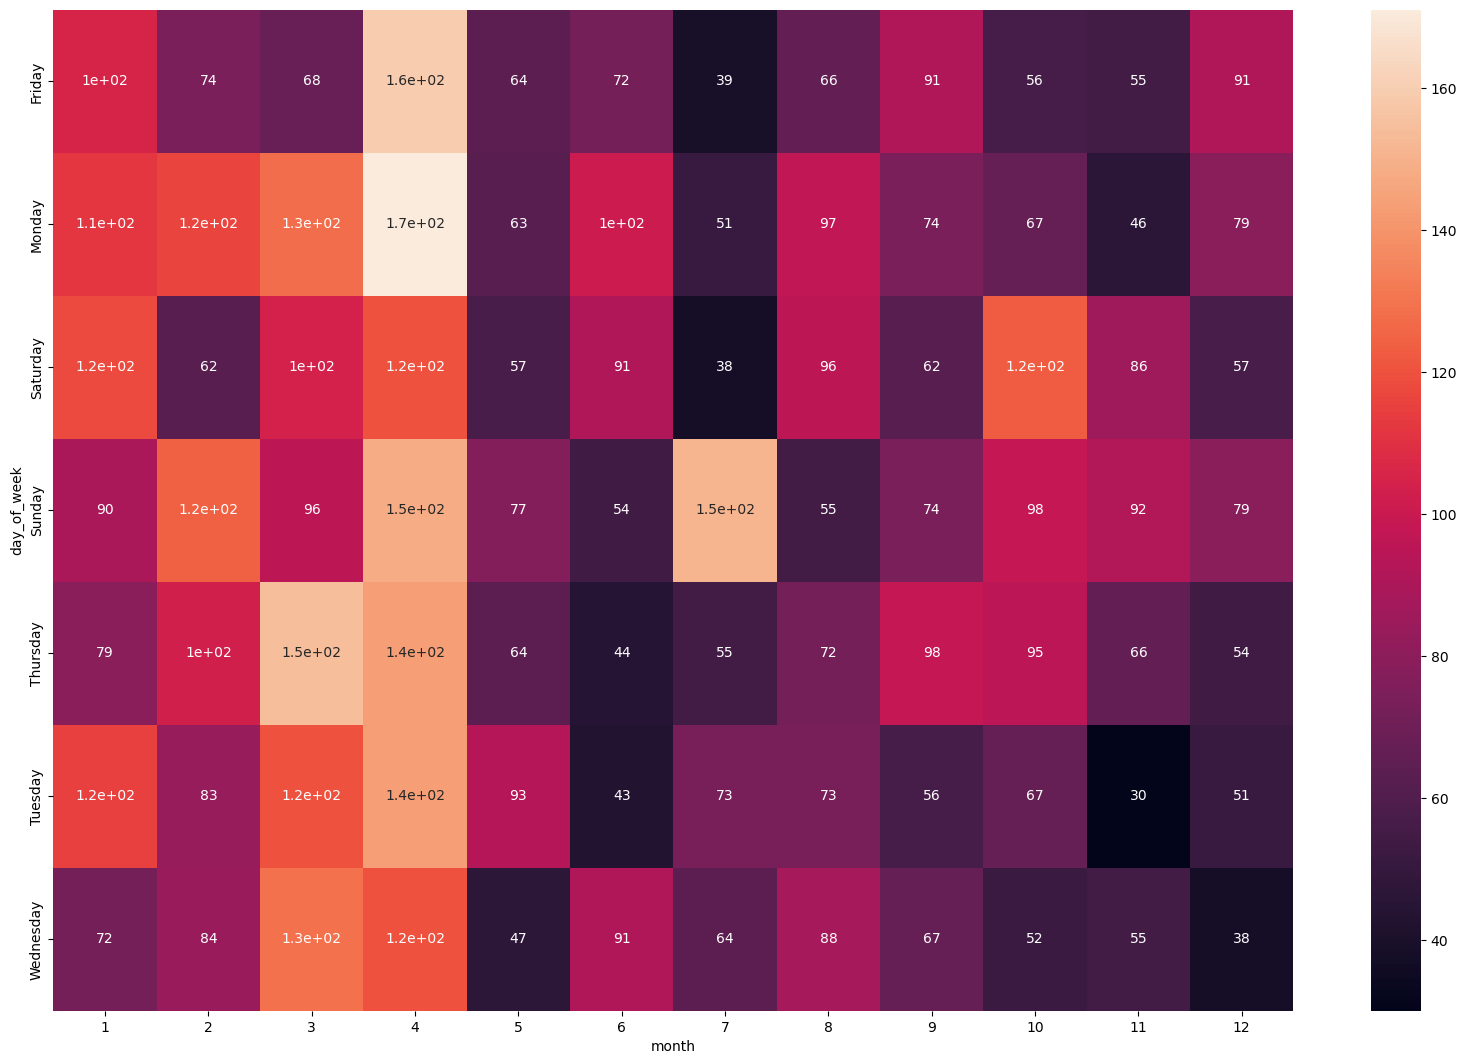

In [15]:
import seaborn as sns

df['day_of_week']=df['order_date'].apply(lambda x: x.day_name())
df['month']=df['order_date'].apply(lambda x: x.month)

df_grouped = df.groupby(['day_of_week','month']).agg({'quantity':'sum'}).reset_index()

plt.subplots(figsize=(20,13))
sns.heatmap(df_grouped.pivot_table(index='day_of_week', columns='month', values='quantity', aggfunc='mean'),
           annot=True)
plt.show()

### Interactive Sales Analysis (Plotly)

Interactive bar charts allow deeper exploration of:

- Sales performance by year
- Store comparison
- Staff contribution
- Discount impact

Interactive visualization improves interpretability and analytical flexibility.

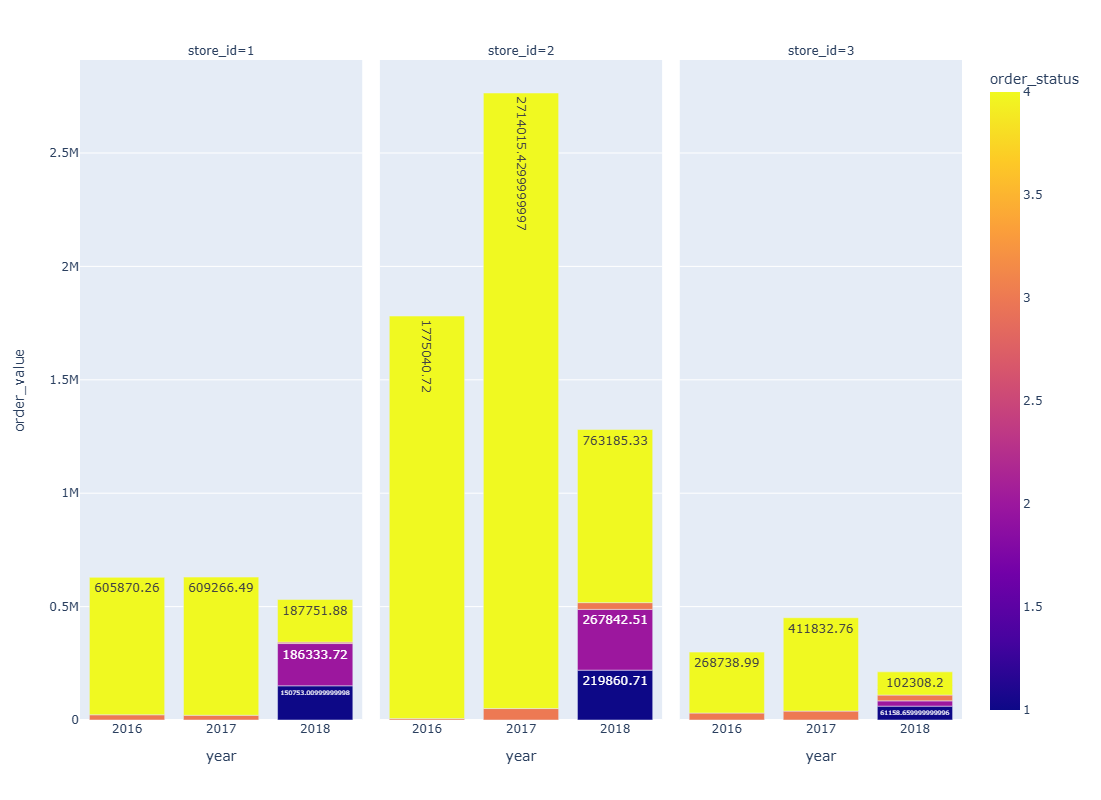

In [ ]:
df['year'] = df['order_date'].apply(lambda x: x.year)

df['order_value'] = df['list_price'] * df['quantity']
df_grouped = df.groupby(['year', 'order_status', 'store_id']).agg({'order_value':'sum'}).reset_index()

fig = px.bar(df_grouped,
             x='year',
             y='order_value',
             text='order_value',
             color='order_status',
             facet_col='store_id',
             barmode='group', 
             width=1100, height=800)

fig.show()

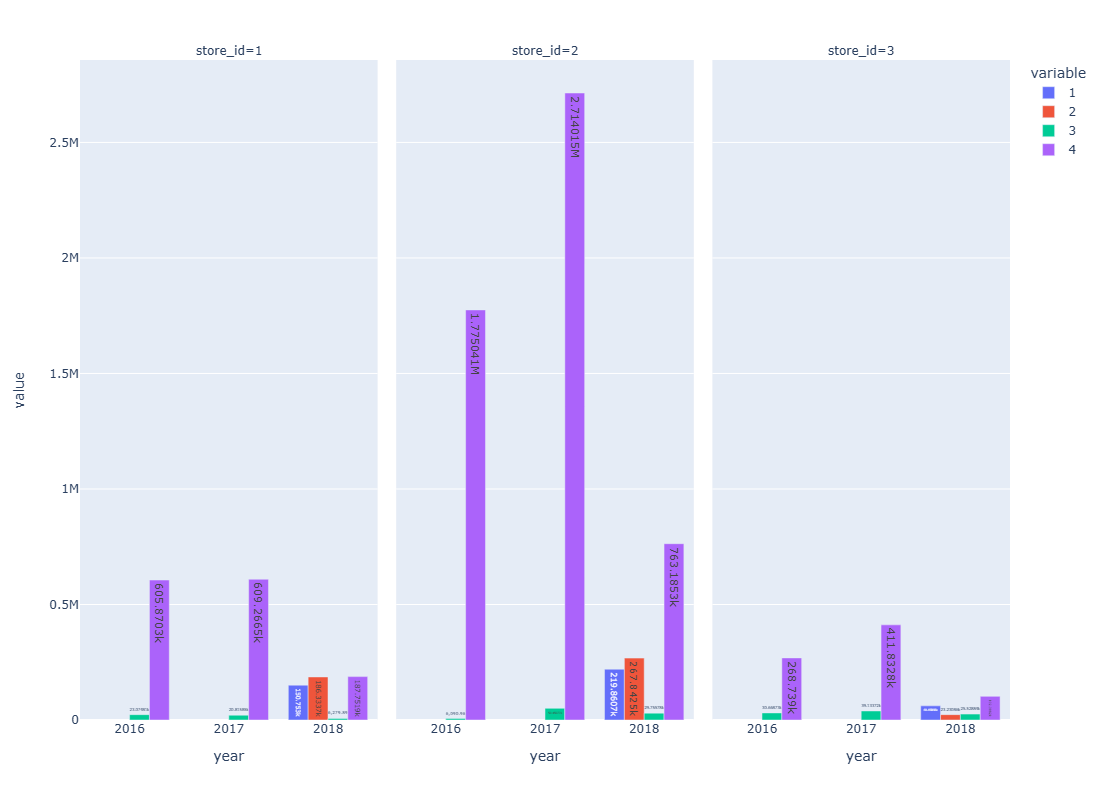

In [ ]:
df['year'] = df['order_date'].apply(lambda x: x.year)

df['order_value'] = df['list_price'] * df['quantity']
df_pivot = df.pivot_table(index=['year', 'store_id'], columns='order_status', values='order_value', aggfunc='sum').reset_index()

fig = px.bar(df_pivot,
             x='year',
             y=df_pivot.columns[2:],
             text_auto=True,
             facet_col='store_id',
             barmode='group',
             width=1100, height=800)

fig.show()

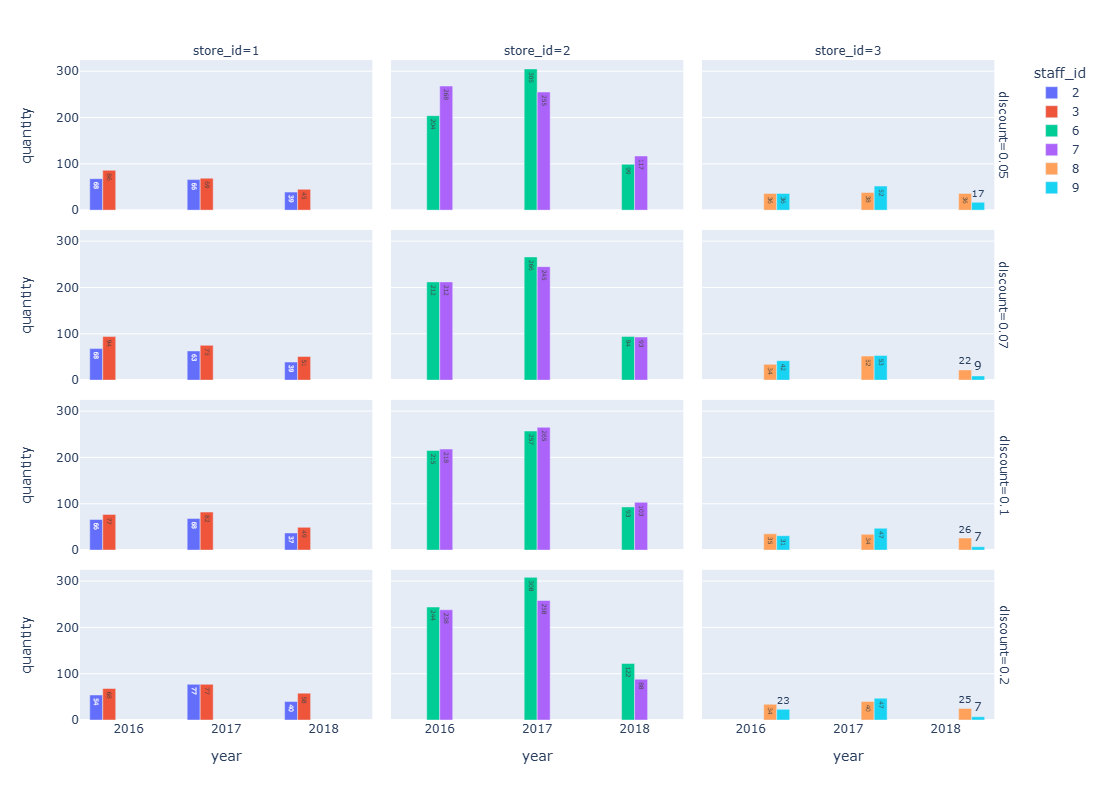

In [22]:
import plotly.express as px

df['year']=df['order_date'].apply(lambda x: x.year)

df_grouped = df.groupby(['year','staff_id', 'discount', 'store_id']).agg({'quantity':'sum'}).reset_index()
df_grouped['staff_id']=df_grouped['staff_id'].astype('str')

fig=px.bar(df_grouped,
       x='year',
       y='quantity',
           text='quantity',
        color='staff_id',
        facet_col='store_id',
               facet_row='discount',
           barmode='group',
       width=1000, height=800)
fig.show()

## 3. Distribution Analysis

In this section, we analyze statistical distributions of key numerical variables.

The goal is to:
- Understand distribution shapes
- Detect skewness
- Identify heavy tails
- Prepare data for potential modeling

### Distribution of Product Prices

The histogram of `list_price` shows the spread of product pricing.

We evaluate:
- Price concentration
- Skewness
- Presence of extreme values

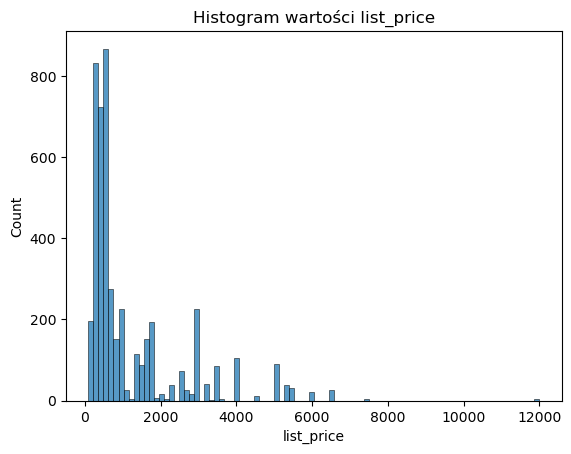

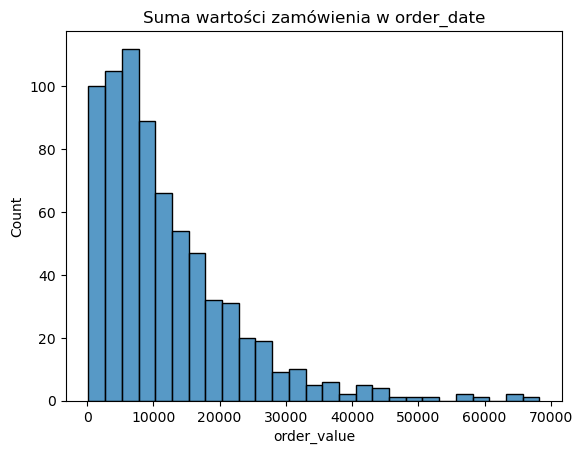

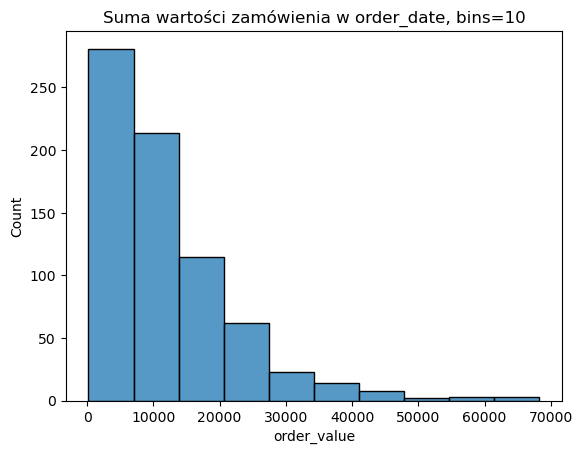

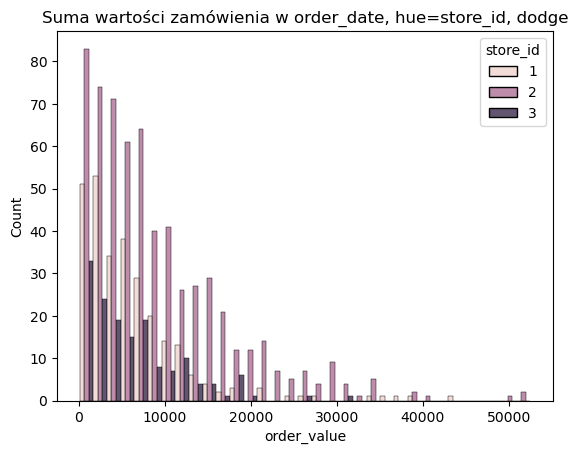

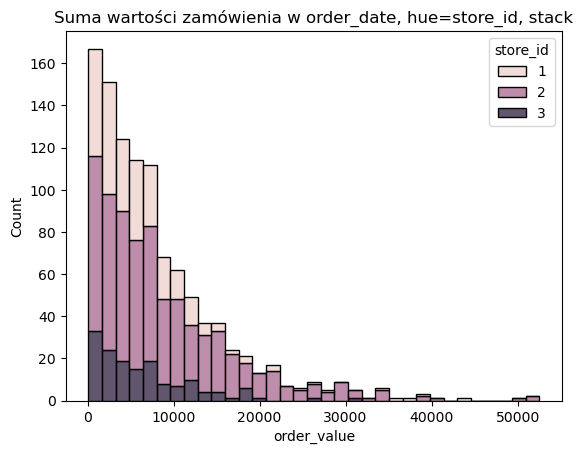

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sns.histplot(df, x='list_price')
plt.title('Histogram wartości list_price')
plt.show()

sns.histplot(df.groupby(['order_date']).agg({'order_value': 'sum'}).reset_index(),
             x='order_value').set(title='Suma wartości zamówienia w order_date')
plt.show()

sns.histplot(df.groupby(['order_date']).agg({'order_value': 'sum'}).reset_index(),
             x='order_value', bins=10).set(title='Suma wartości zamówienia w order_date, bins=10')
plt.show()

sns.histplot(df.groupby(['order_date', 'store_id']).agg({'order_value': 'sum'}).reset_index(),
             x='order_value', hue='store_id', multiple='dodge').set(
    title='Suma wartości zamówienia w order_date, hue=store_id, dodge')
plt.show()

sns.histplot(df.groupby(['order_date', 'store_id']).agg({'order_value': 'sum'}).reset_index(),
             x='order_value', hue='store_id', multiple='stack').set(
    title='Suma wartości zamówienia w order_date, hue=store_id, stack')
plt.show()

### Distribution of Ordered Quantity

This histogram presents distribution of ordered quantity at:
- Transaction level
- Aggregated daily level

It helps determine whether the data is normally distributed or skewed.

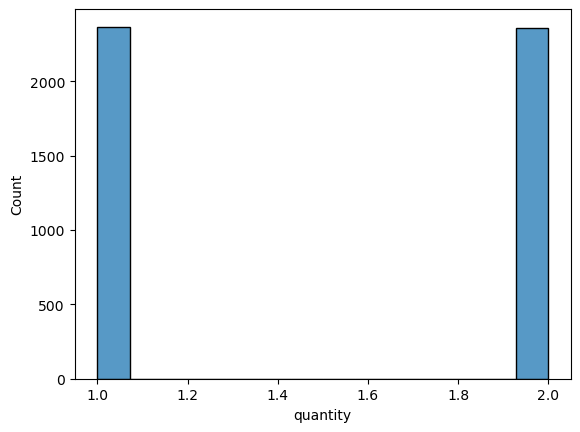

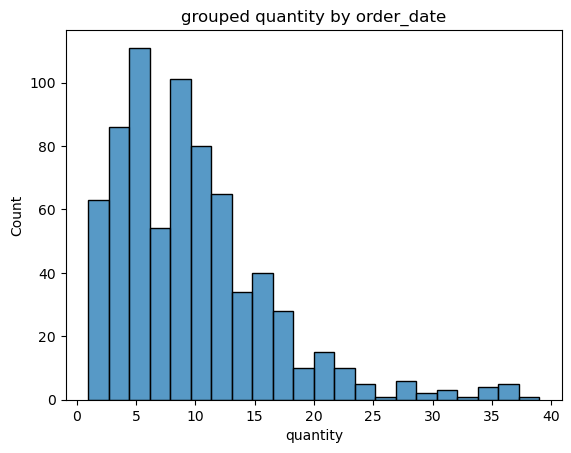

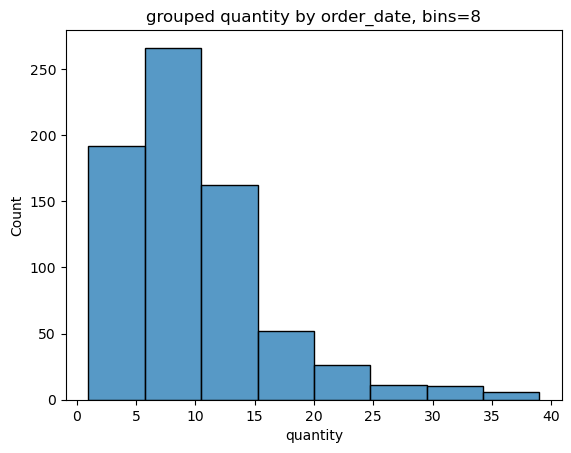

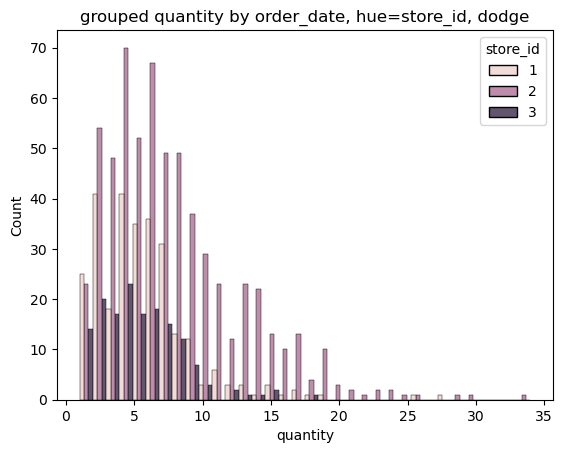

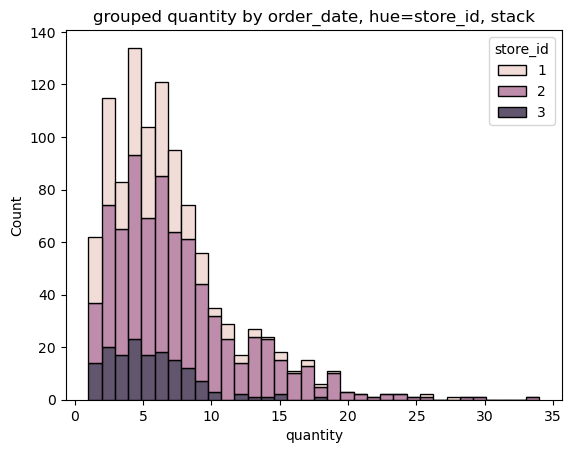

In [50]:
sns.histplot(df,
            x='quantity')
plt.show()

sns.histplot(df.groupby(['order_date']).agg({'quantity':'sum'}).reset_index(),
            x='quantity').set(title='grouped quantity by order_date')
plt.show()
sns.histplot(df.groupby(['order_date']).agg({'quantity':'sum'}).reset_index(),
            x='quantity',
            bins=8).set(title='grouped quantity by order_date, bins=8')
plt.show()

sns.histplot(df.groupby(['order_date','store_id']).agg({'quantity':'sum'}).reset_index(),
            x='quantity',
            hue='store_id',
            multiple='dodge').set(title='grouped quantity by order_date, hue=store_id, dodge')
plt.show()
sns.histplot(df.groupby(['order_date','store_id']).agg({'quantity':'sum'}).reset_index(),
            x='quantity',
            hue='store_id',
            multiple='stack').set(title='grouped quantity by order_date, hue=store_id, stack')
plt.show()

### Boxplot Analysis – Order Value and Quantity

Boxplots allow detection of:

- Median differences across years
- Inter-store variability
- Extreme outliers

This step is important before applying machine learning models sensitive to outliers.

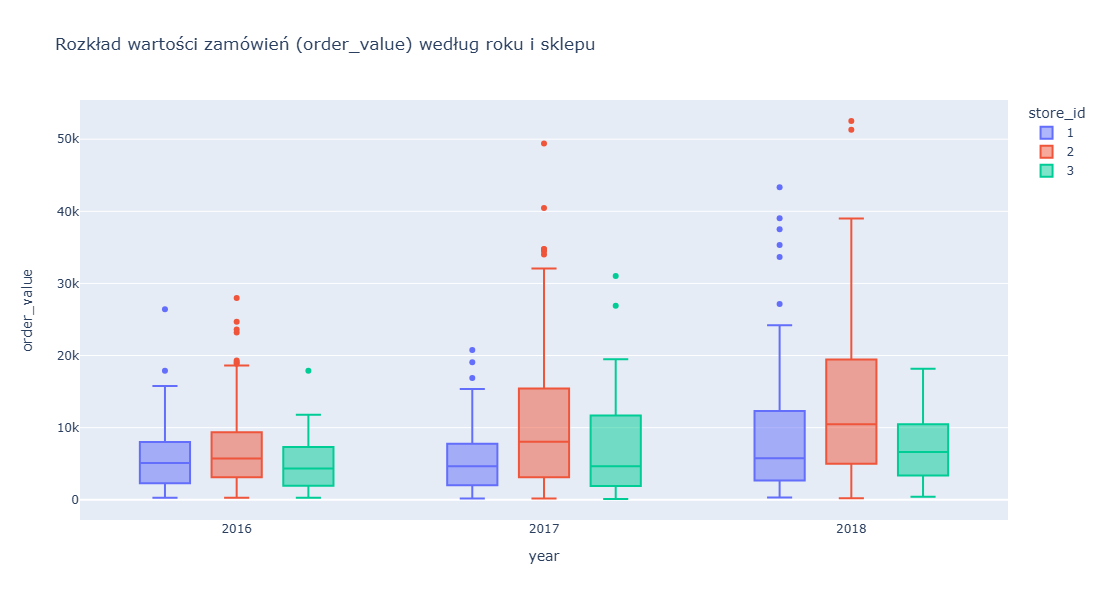

In [156]:
px.box(df.groupby(['order_date', 'store_id', 'year']).agg({'order_value': 'sum'}).reset_index(),
             y='order_value',
             x='year',
             color='store_id',
             title="Rozkład wartości zamówień (order_value) według roku i sklepu",
             width=1000, height=600)

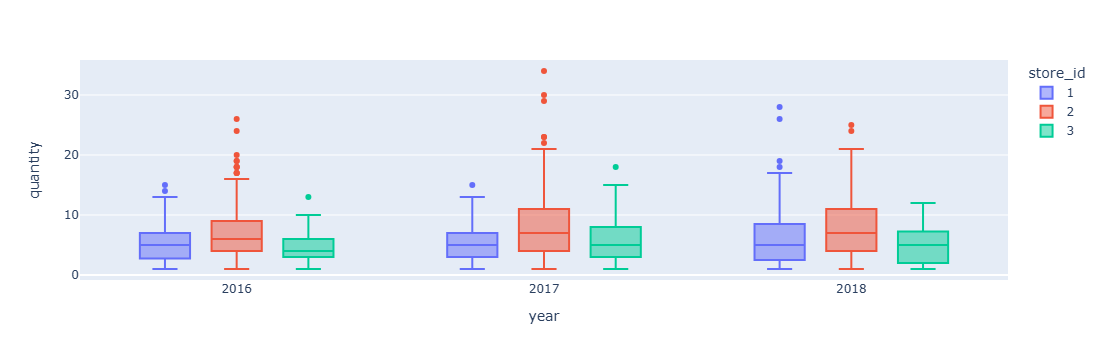

In [ ]:
px.box(df.groupby(['order_date','store_id', 'year']).agg({'quantity':'sum'}).reset_index(),
      y='quantity',
      x='year',
      color='store_id',
      )

### Statistical Distribution Fitting

The `distfit` library is used to:

- Fit theoretical distributions to empirical data
- Identify the best-fitting distribution
- Compare raw and log-transformed variables

This is useful when:
- Building probabilistic models
- Understanding tail behavior
- Applying parametric methods

In [160]:
df_grouped = df.groupby('order_date').agg({'order_value':'sum'}).reset_index()

dist1 = distfit(bins=20)

results=dist1.fit_transform(df_grouped['order_value'],verbose=0)

(<Figure size 2000x1500 with 1 Axes>,
 <Axes: title={'center': '\nbeta(a=1.34843, b=1.19567e+13, loc=134.557, scale=1.01175e+17)'}, xlabel='Values', ylabel='Frequency'>)

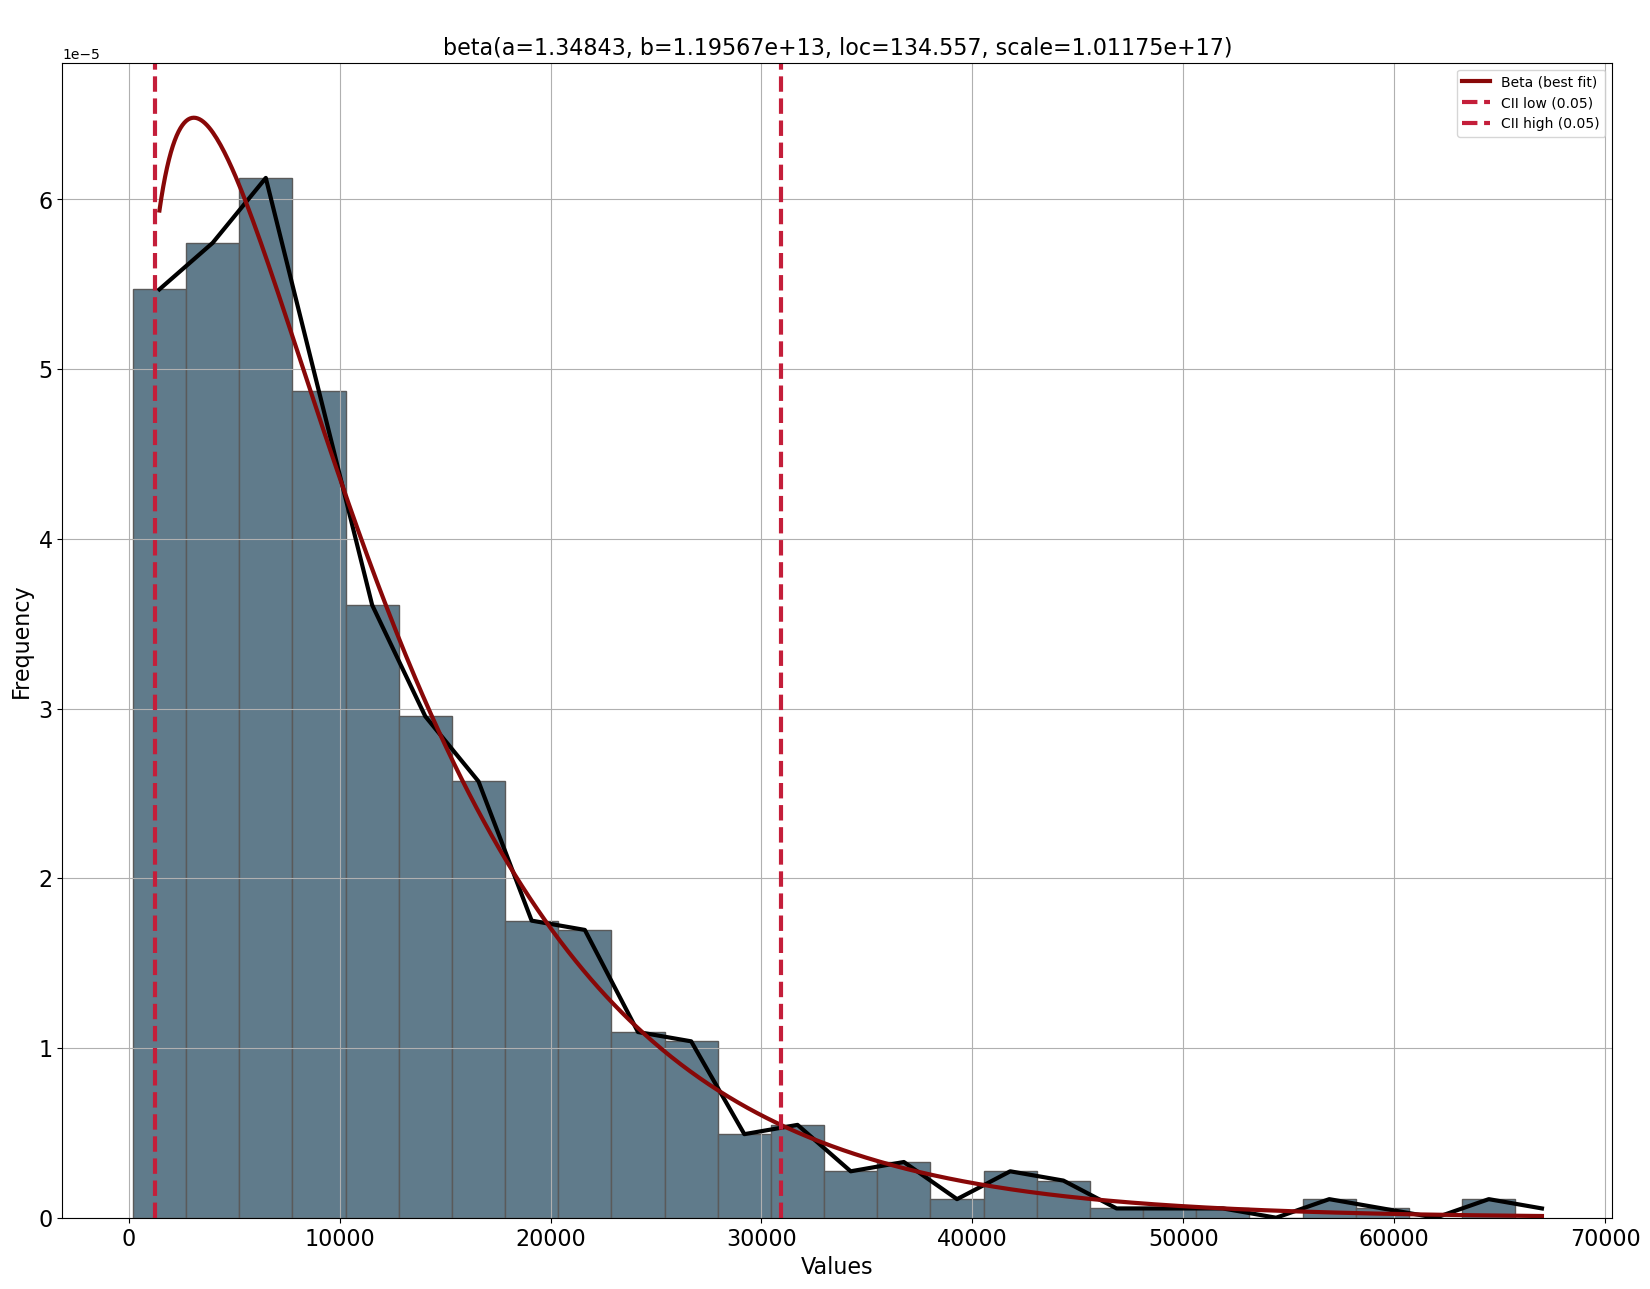

In [60]:
dist1.plot(verbose=0)

In [56]:
import matplotlib.pyplot as plt
from distfit import distfit

df_grouped = df.groupby('order_date').agg({'quantity':'sum'}).reset_index()

dist1 = distfit(bins=15)

results=dist1.fit_transform(df_grouped['quantity'],verbose=0)

(<Figure size 2000x1500 with 1 Axes>,
 <Axes: title={'center': '\nbeta(a=1.34843, b=1.19567e+13, loc=134.557, scale=1.01175e+17)'}, xlabel='Values', ylabel='Frequency'>)

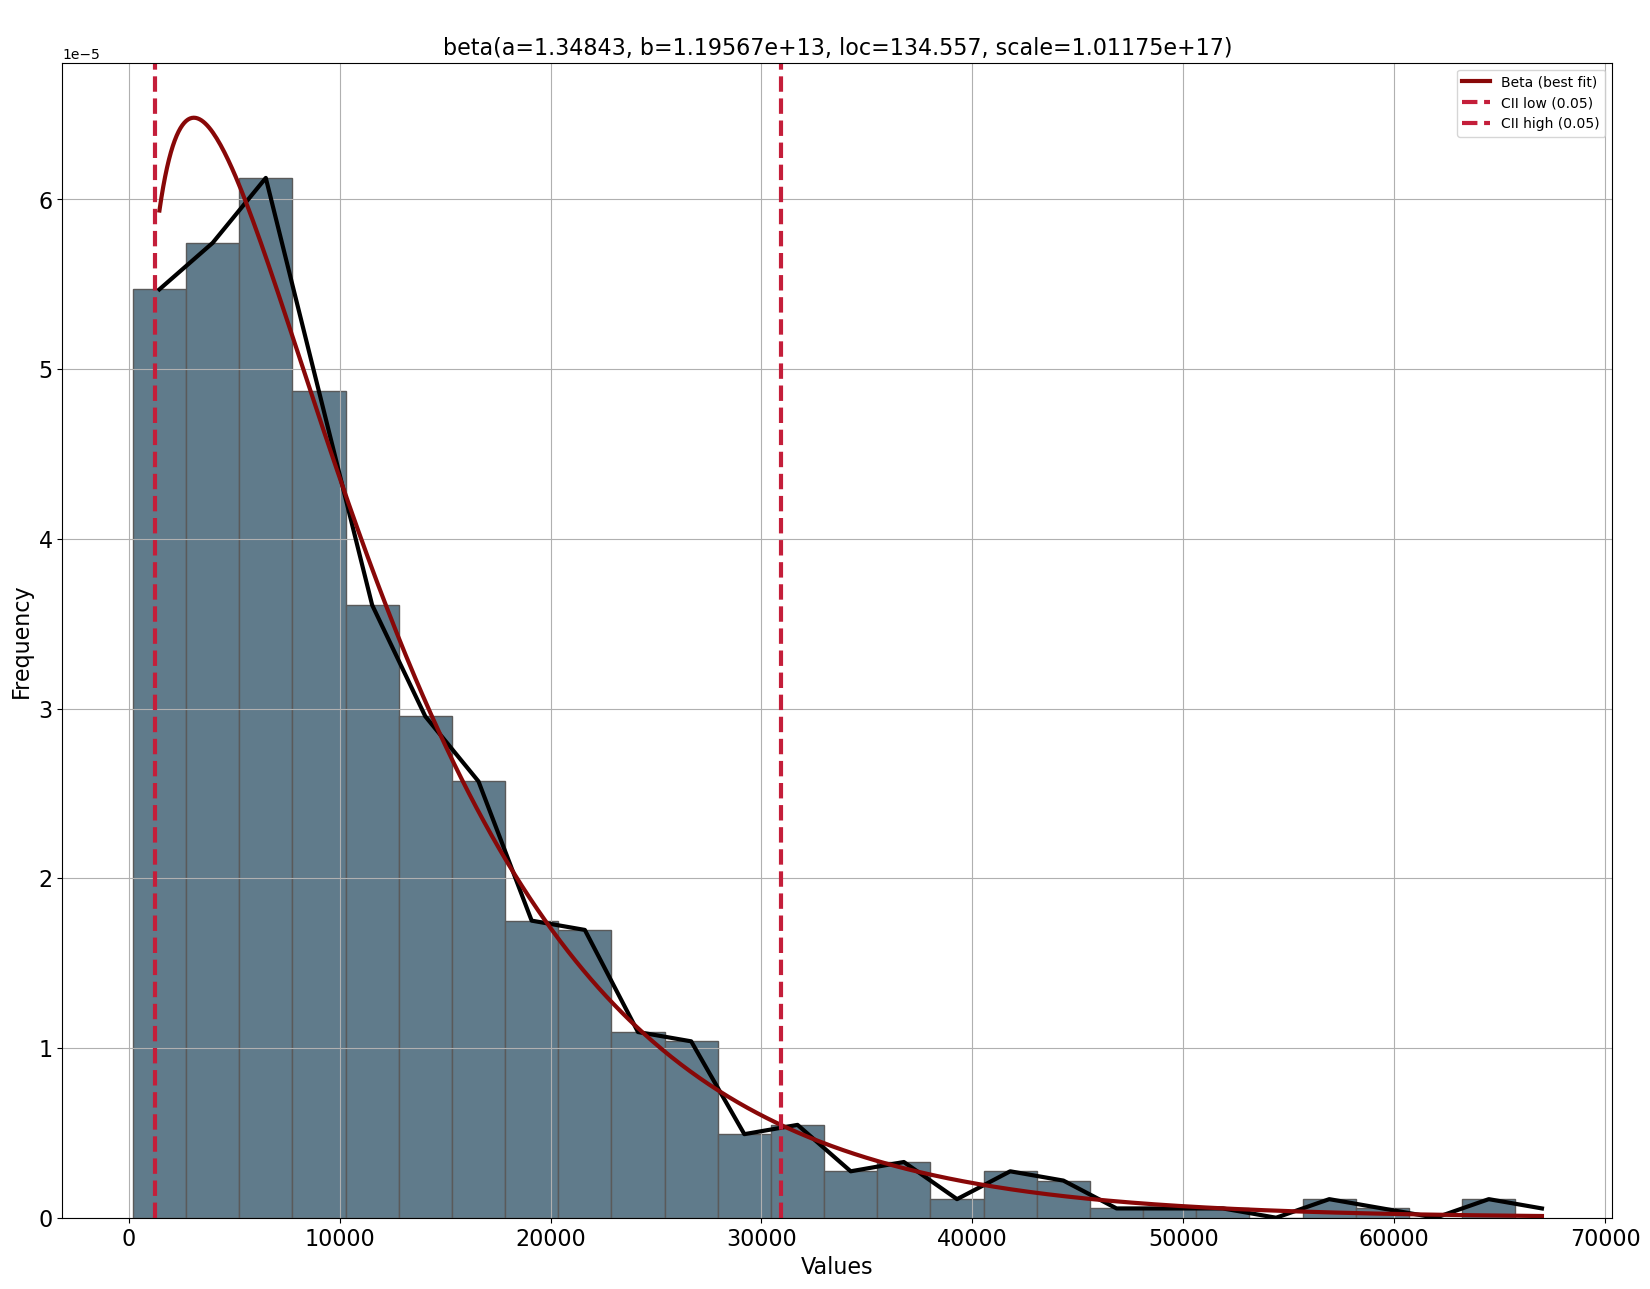

In [62]:
dist1.plot(verbose=0)

(<Figure size 2000x1000 with 1 Axes>,
 <Axes: title={'center': 'Beta (best fit)'}, xlabel='Probability Density Function (PDF)', ylabel='RSS (goodness of fit test)'>)

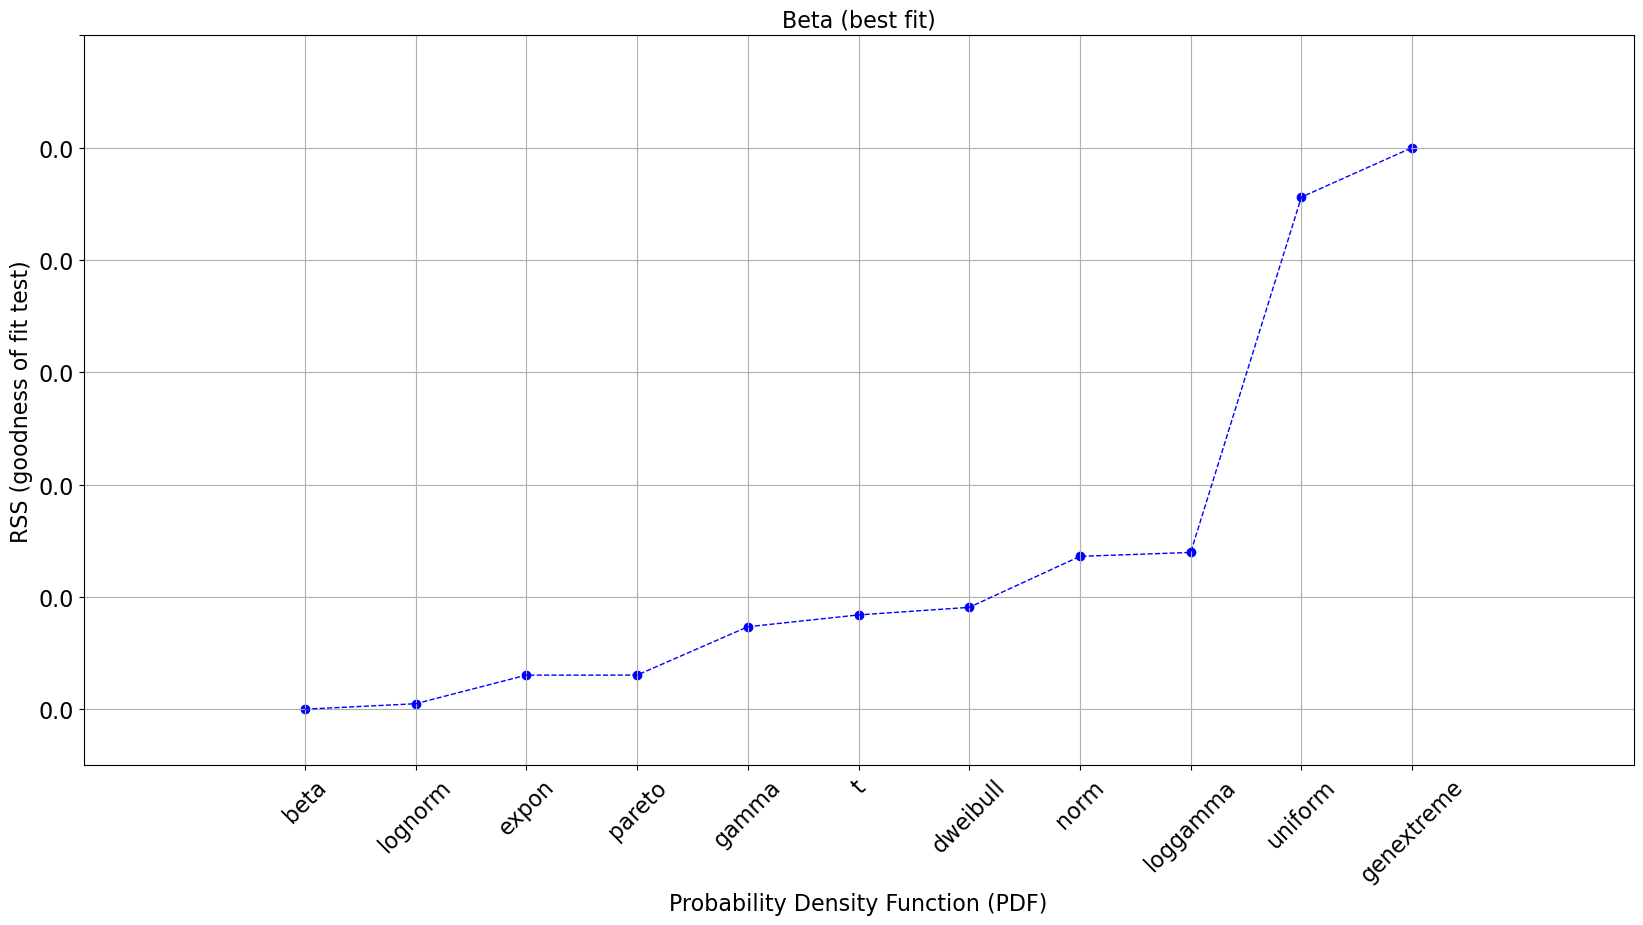

In [64]:
dist1.plot_summary()

In [66]:
dist1.summary

name score                  loc                 scale  \
0         beta   0.0           134.556646  101174879629083920.0   
1      lognorm   0.0         -1726.712651          10444.185958   
2        expon   0.0               189.99           11643.09811   
3       pareto   0.0 -549755813698.009766   549755813887.999756   
4        gamma   0.0        -18375.472039           2581.294846   
5            t   0.0          9455.538963           6578.526867   
6     dweibull   0.0          9432.676301           7387.391049   
7         norm   0.0          11833.08811          10308.341601   
8     loggamma   0.0      -2501753.926656         356658.933762   
9      uniform   0.0               189.99              68083.65   
10  genextreme   0.0           191.425072              9.292593   

                                        arg  \
0   (1.348433418591585, 11956734219955.906)   
1                     (0.7406546478419213,)   
2                                        ()   
3                      (47217314.40747927,)   
4                     (11.659274207705113,)   
5                     (3.0750663834861536,)   
6                     (1.0516335156047443,)   
7                                        ()   
8                      (1150.473155667225,)   
9                                        ()   
10                     (-6.47533312490131,)   

                                               params  \
0   (1.348433418591585, 11956734219955.906, 134.55...   
1   (0.7406546478419213, -1726.7126514248328, 1044...   
2                        (189.99, 11643.098110344827)   
3   (47217314.40747927, -549755813698.00977, 54975...   
4   (11.659274207705113, -18375.472039133234, 2581...   
5   (3.0750663834861536, 9455.538962983017, 6578.5...   
6   (1.0516335156047443, 9432.676301195675, 7387.3...   
7            (11833.088110344826, 10308.341600693288)   
8   (1150.473155667225, -2501753.9266561624, 35665...   
9                                  (189.99, 68083.65)   
10  (-6.47533312490131, 191.4250724982891, 9.29259...   

                                                model bootstrap_score  \
0   <scipy.stats._distn_infrastructure.rv_continuo...               0   
1   <scipy.stats._distn_infrastructure.rv_continuo...               0   
2   <scipy.stats._distn_infrastructure.rv_continuo...               0   
3   <scipy.stats._distn_infrastructure.rv_continuo...               0   
4   <scipy.stats._distn_infrastructure.rv_continuo...               0   
5   <scipy.stats._distn_infrastructure.rv_continuo...               0   
6   <scipy.stats._distn_infrastructure.rv_continuo...               0   
7   <scipy.stats._distn_infrastructure.rv_continuo...               0   
8   <scipy.stats._distn_infrastructure.rv_continuo...               0   
9   <scipy.stats._distn_infrastructure.rv_continuo...               0   
10  <scipy.stats._distn_infrastructure.rv_continuo...               0   

   bootstrap_pass    color  
0            None  #e41a1c  
1            None  #e41a1c  
2            None  #377eb8  
3            None  #4daf4a  
4            None  #984ea3  
5            None  #ff7f00  
6            None  #ffff33  
7            None  #a65628  
8            None  #f781bf  
9            None  #999999  
10           None  #999999

In [ ]:
df_grouped = df.resample('W-Mon', on='order_date').agg({'quantity':'sum'}).reset_index()
df_grouped['log_quantity'] = np.log(df_grouped['quantity'] + 1)  
dist2 = distfit(bins=15)
results_log = dist2.fit_transform(df_grouped['log_quantity'], verbose=0)

In [ ]:
import seaborn as sns
sns.histplot(df_grouped['quantity'], bins=15)
plt.show()

In [ ]:
import plotly.express as px
fig = px.histogram(df_grouped, x='quantity', nbins=15)
fig.show()

In [32]:
import pandas as pd
import numpy as np

df['order_date'] = pd.to_datetime(df['order_date'])
df_grouped_weekly = df.groupby(pd.Grouper(key='order_date', freq='W')).agg({'quantity': 'sum'}).reset_index()
df_grouped_weekly['log_quantity'] = np.log(df_grouped_weekly['quantity'] + 1)

(<Figure size 2000x1500 with 1 Axes>,
 <Axes: title={'center': '\ndweibull(c=1.22563, loc=44.8056, scale=25.5953)'}, xlabel='Values', ylabel='Frequency'>)

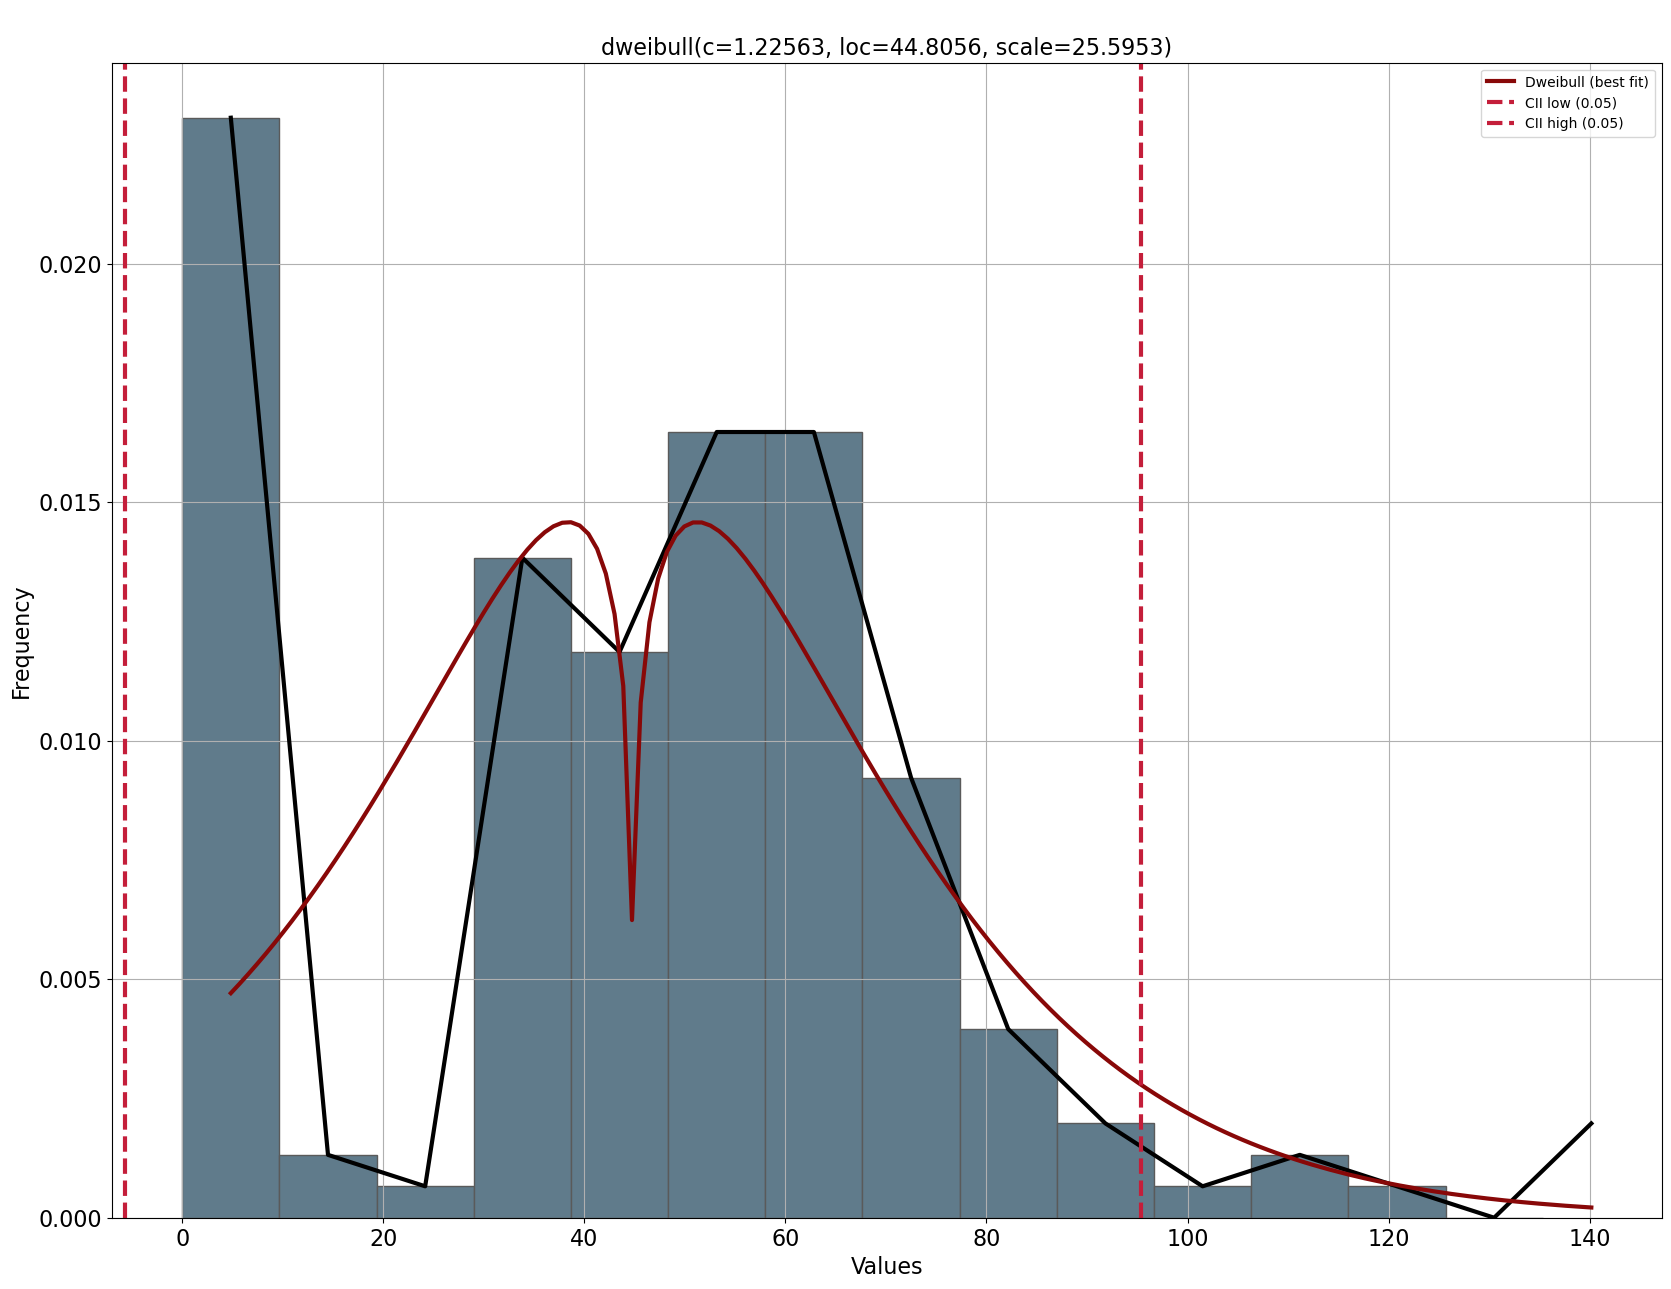

In [34]:
from distfit import distfit

dist1 = distfit(bins=15) 
results = dist1.fit_transform(df_grouped_weekly['quantity'], verbose=0)

dist1.plot(verbose=0)

(<Figure size 2000x1000 with 1 Axes>,
 <Axes: title={'center': 'Dweibull (best fit)'}, xlabel='Probability Density Function (PDF)', ylabel='RSS (goodness of fit test)'>)

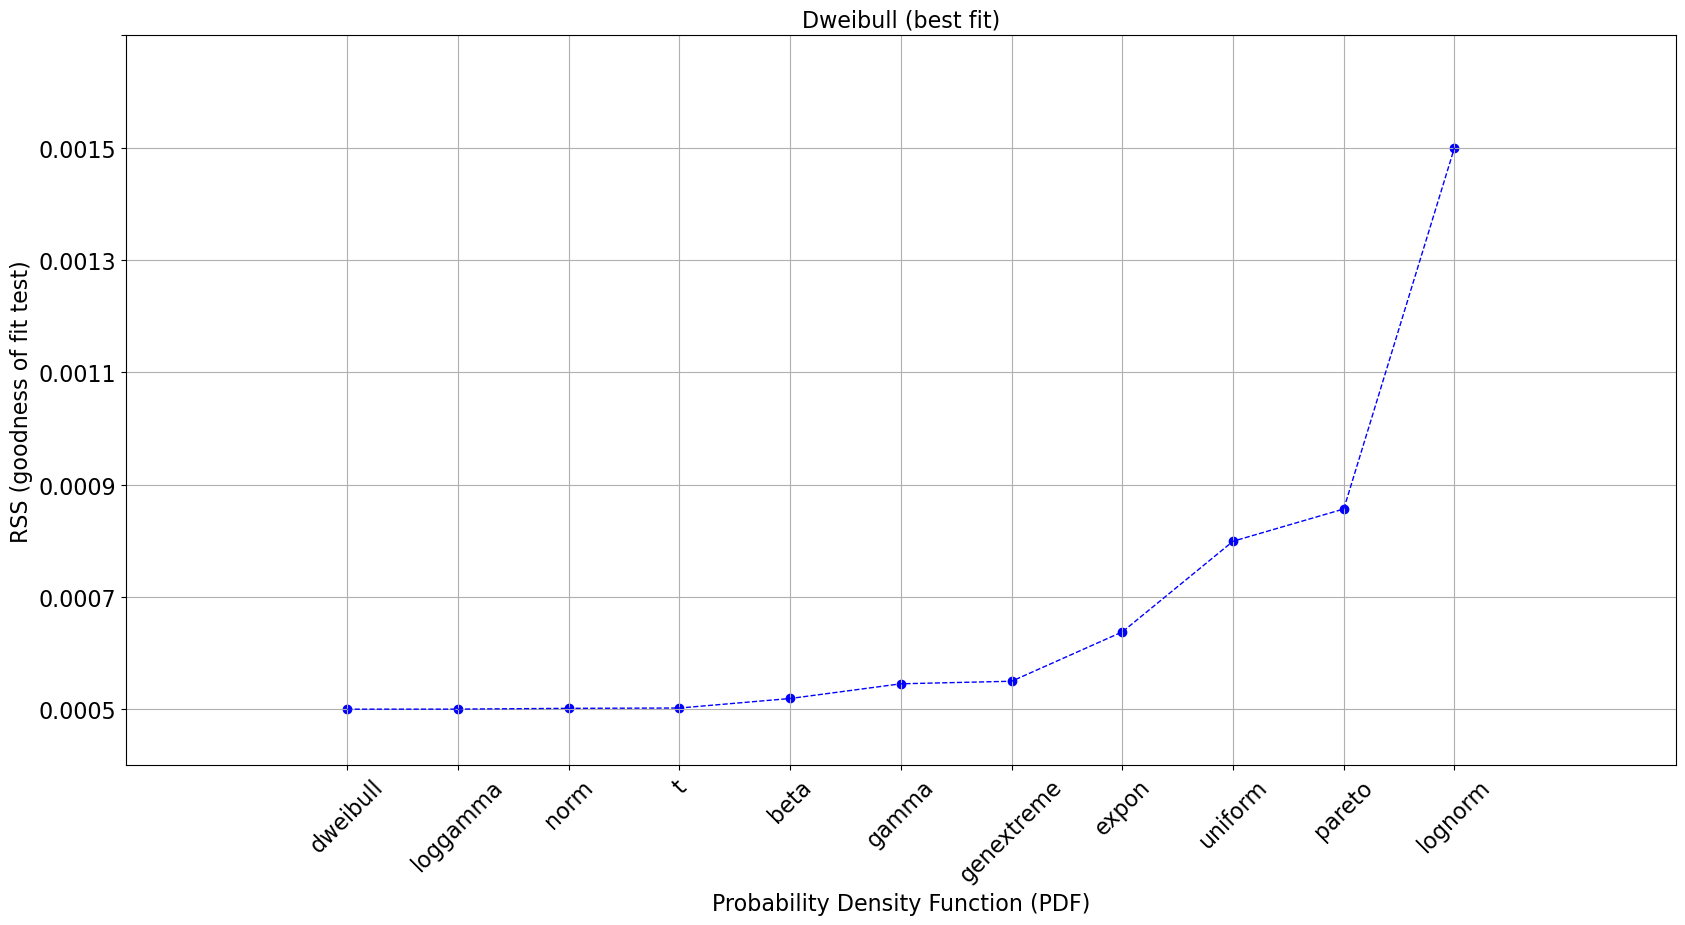

In [35]:
dist1.plot_summary()

(<Figure size 2000x1500 with 1 Axes>,
 <Axes: title={'center': '\nt(df=0.847325, loc=3.98965, scale=0.295337)'}, xlabel='Values', ylabel='Frequency'>)

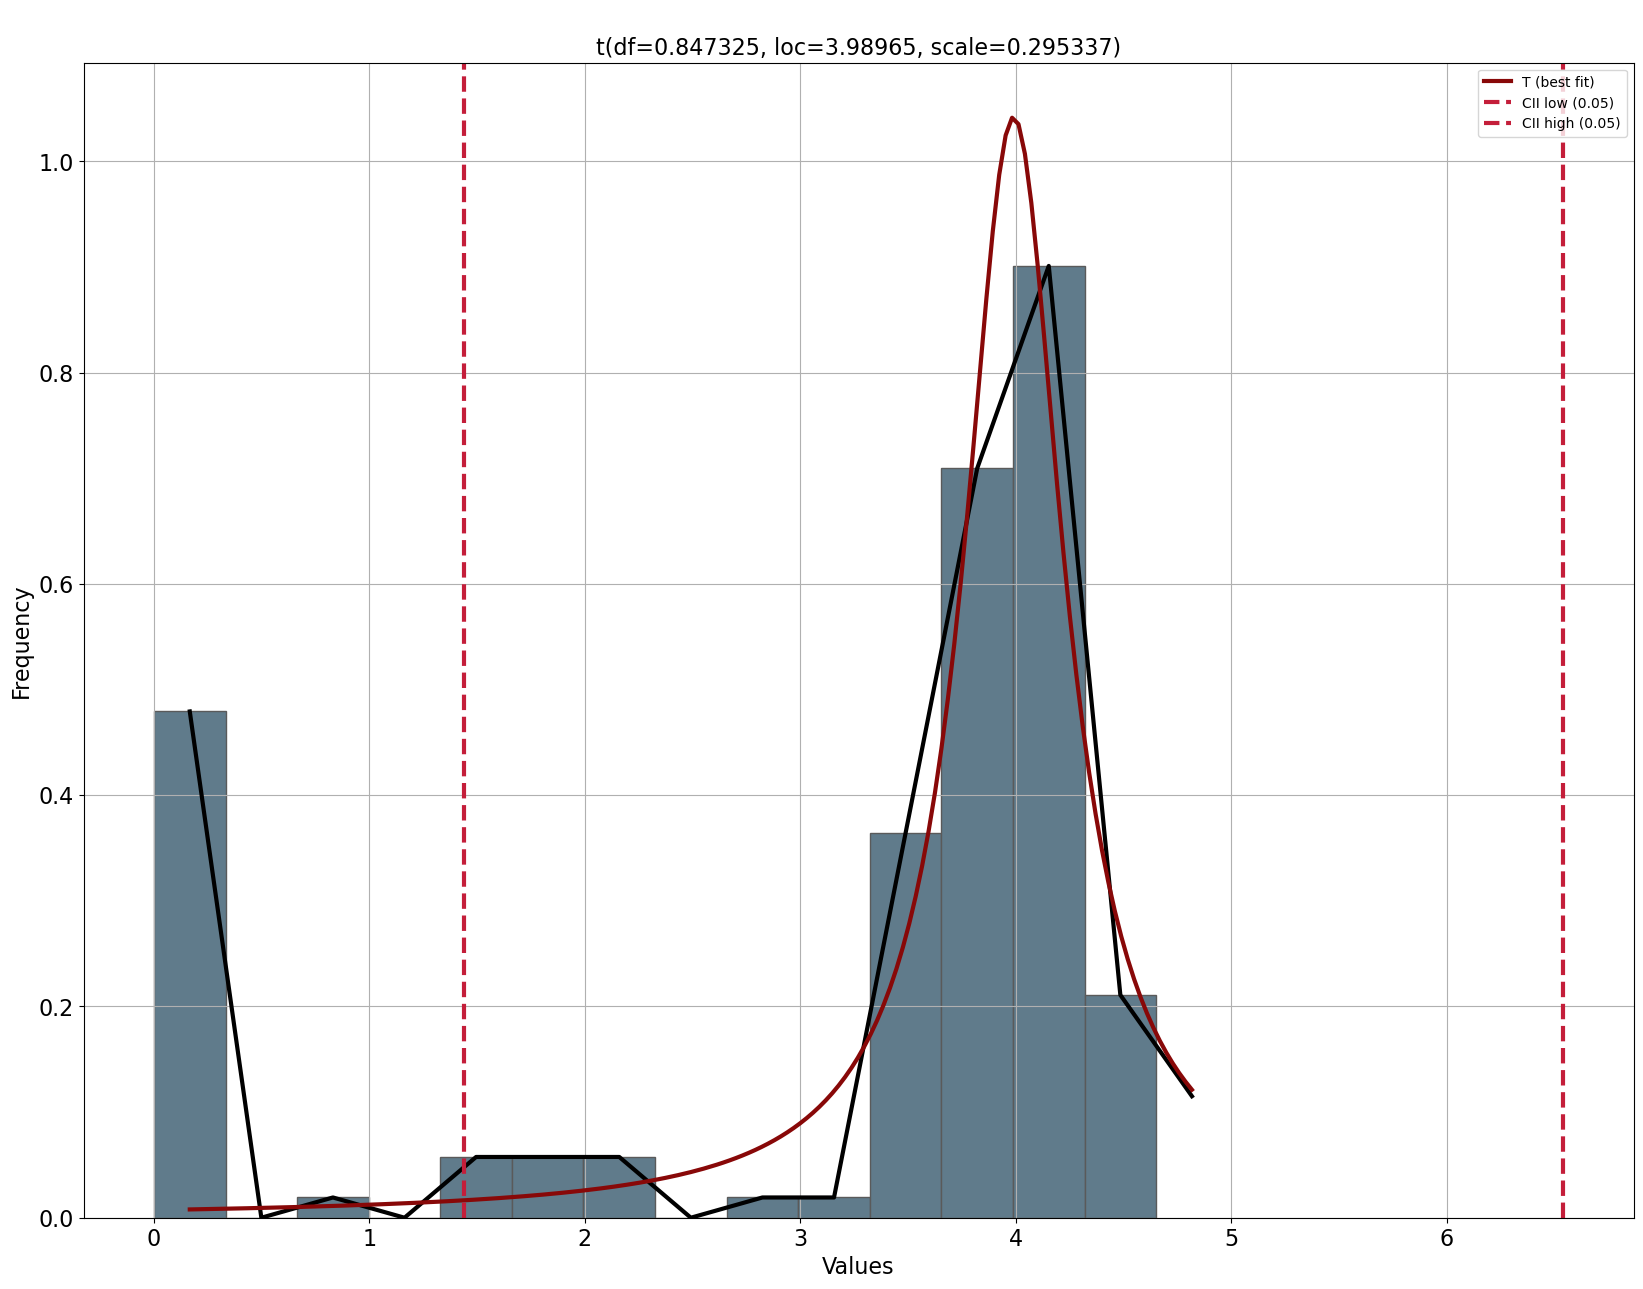

In [38]:
dist2 = distfit(bins=15)
results_log = dist2.fit_transform(df_grouped_weekly['log_quantity'], verbose=0)

dist2.plot(verbose=0)

(<Figure size 2000x1000 with 1 Axes>,
 <Axes: title={'center': 'T (best fit)'}, xlabel='Probability Density Function (PDF)', ylabel='RSS (goodness of fit test)'>)

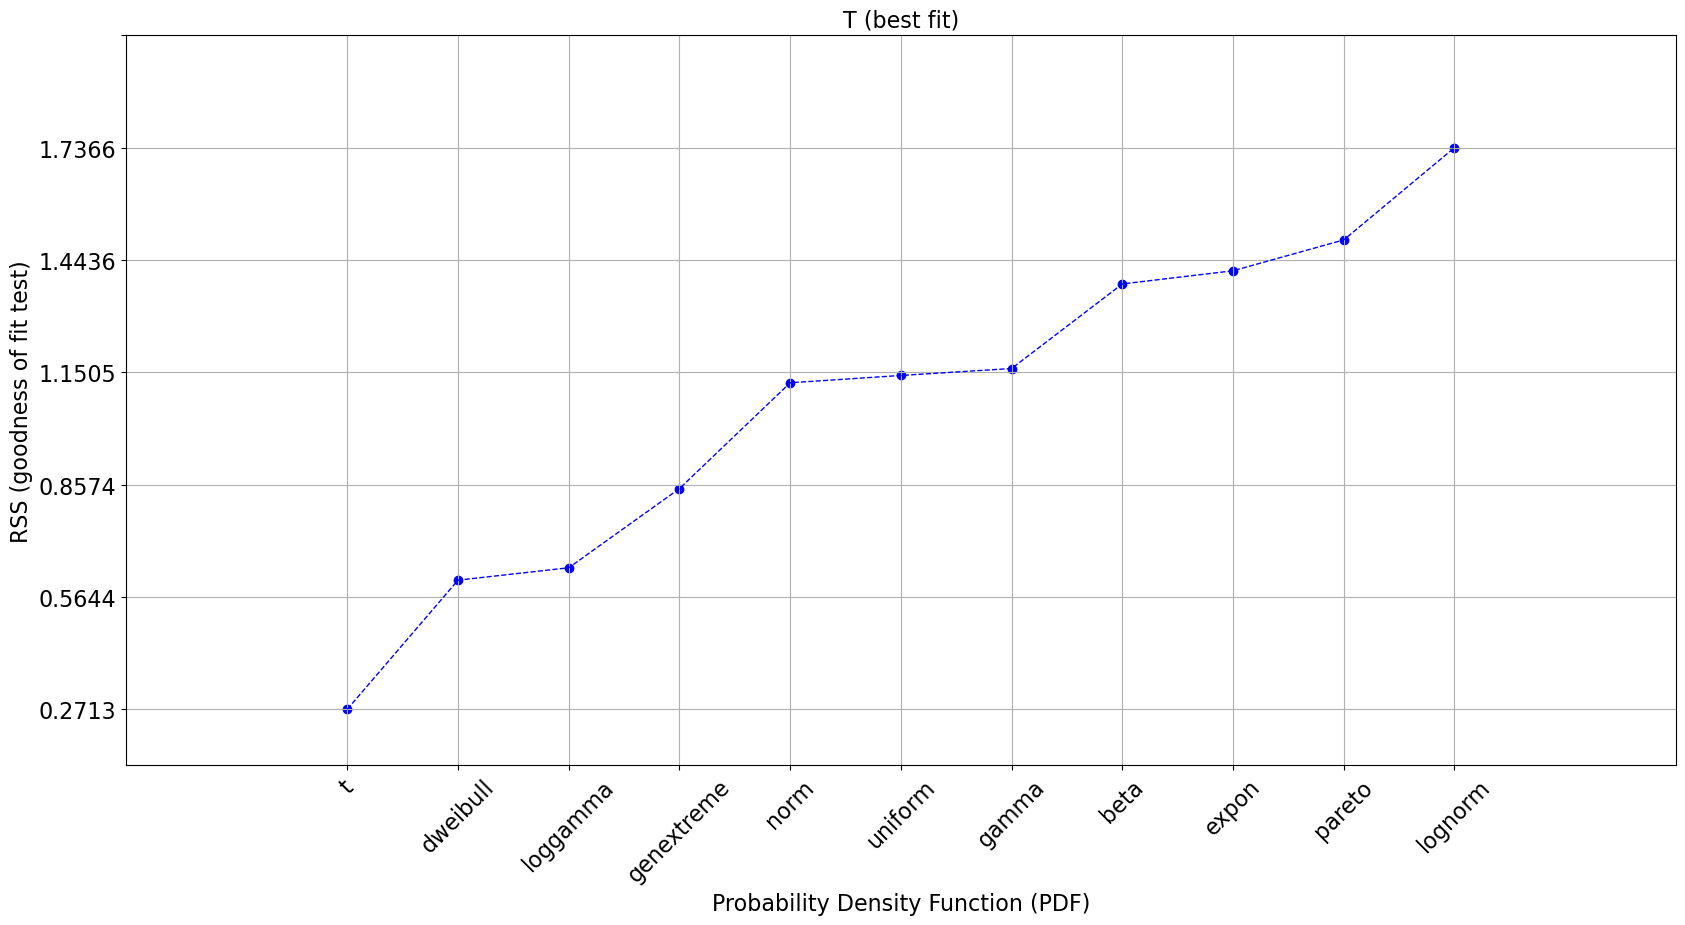

In [40]:
dist2.plot_summary()

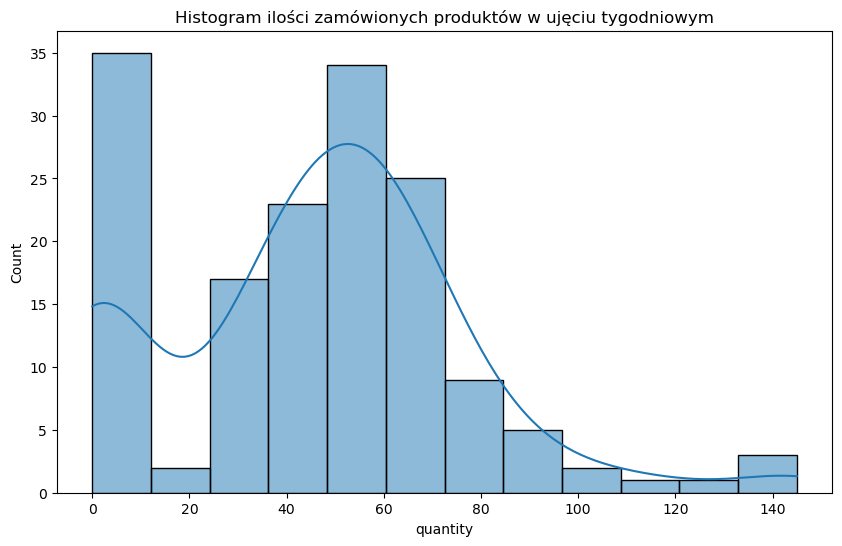

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(df_grouped_weekly['quantity'], kde=True)
plt.title('Histogram ilości zamówionych produktów w ujęciu tygodniowym')
plt.show()

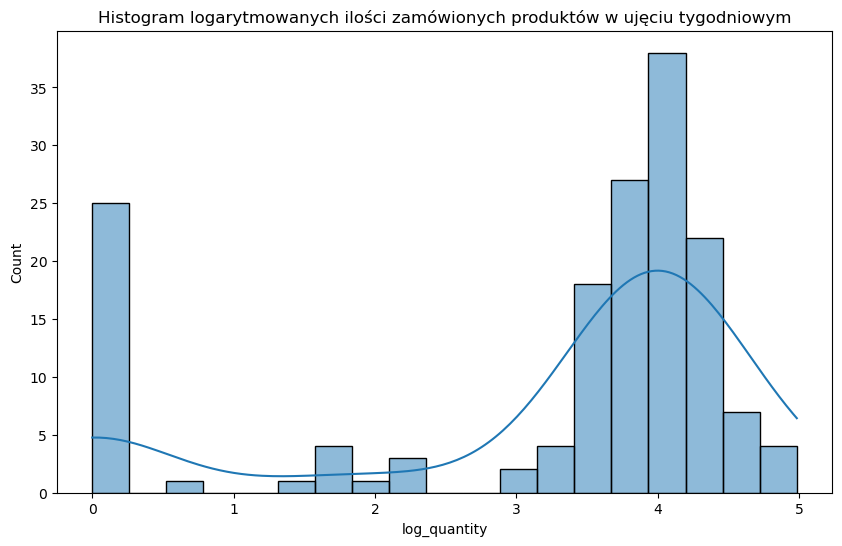

In [50]:
plt.figure(figsize=(10, 6))
sns.histplot(df_grouped_weekly['log_quantity'], kde=True)
plt.title('Histogram logarytmowanych ilości zamówionych produktów w ujęciu tygodniowym')
plt.show()

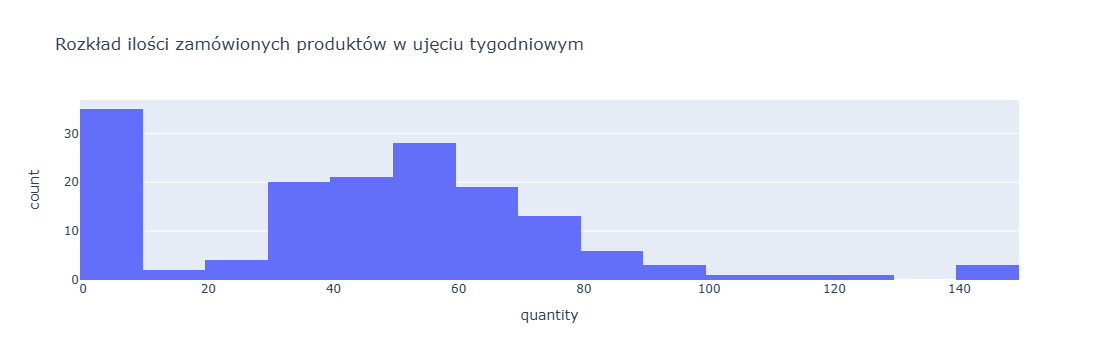

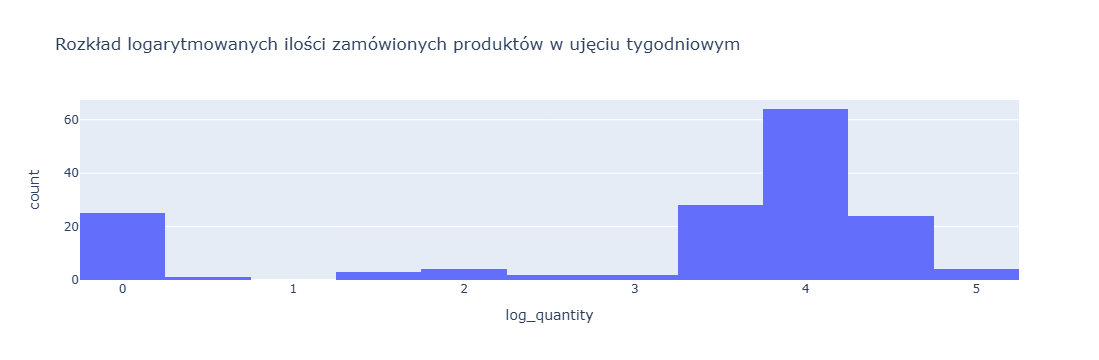

In [52]:
import plotly.express as px

fig1 = px.histogram(df_grouped_weekly, x='quantity', nbins=15, title="Rozkład ilości zamówionych produktów w ujęciu tygodniowym")
fig1.show()

fig2 = px.histogram(df_grouped_weekly, x='log_quantity', nbins=15, title="Rozkład logarytmowanych ilości zamówionych produktów w ujęciu tygodniowym")
fig2.show()

## 4. Missing Data Analysis

Handling missing values is a critical step in data preprocessing.

This section includes:
- Numerical and percentage analysis of null values
- Visualization using missingno
- Comparison of imputation techniques
- Evaluation of imputation vs row removal strategies

In [68]:
import missingno as msno
import numpy as np

<Axes: >

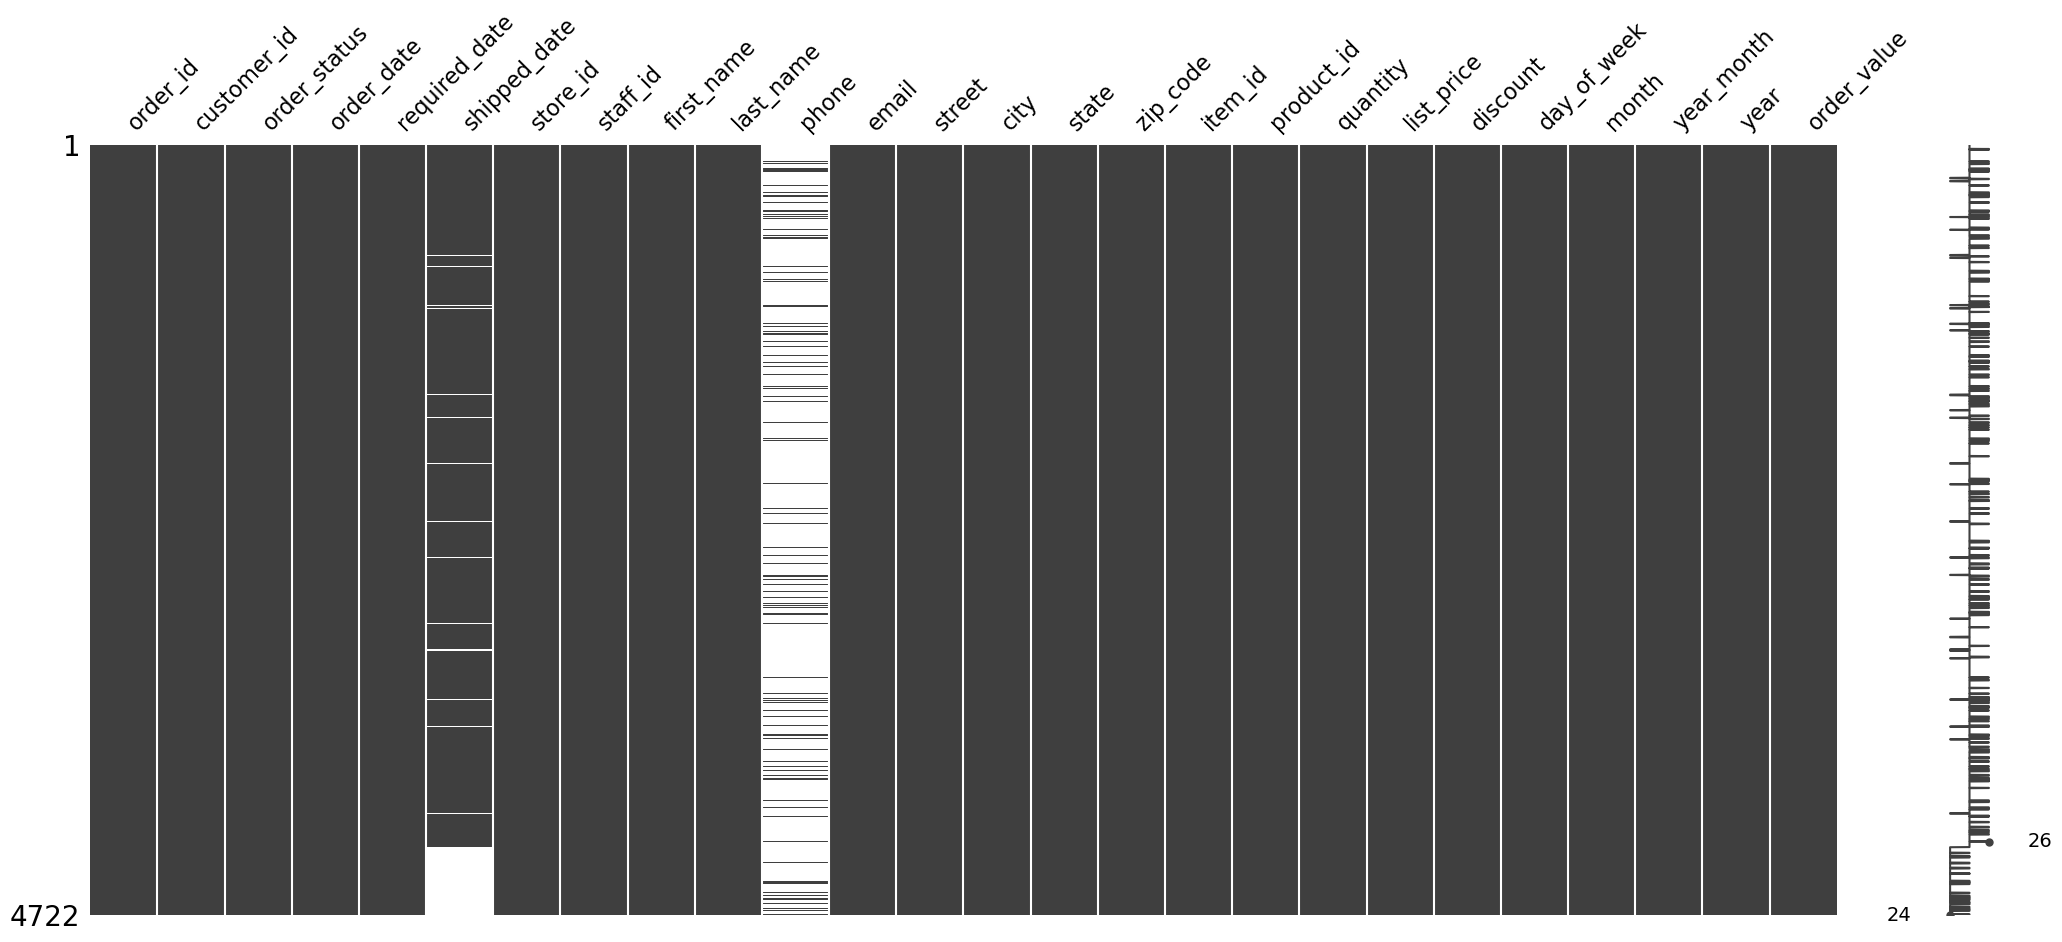

In [70]:
msno.matrix(df)

In [72]:
missing_counts = df.isna().sum()
print(missing_counts)

order_id            0
customer_id         0
order_status        0
order_date          0
required_date       0
shipped_date      508
store_id            0
staff_id            0
first_name          0
last_name           0
phone            4114
email               0
street              0
city                0
state               0
zip_code            0
item_id             0
product_id          0
quantity            0
list_price          0
discount            0
day_of_week         0
month               0
year_month          0
year                0
order_value         0
dtype: int64


In [ ]:
missing_percentage = (df.isna().mean() * 100)
print(missing_percentage)

order_id          0.000000
customer_id       0.000000
order_status      0.000000
order_date        0.000000
required_date     0.000000
shipped_date     10.758153
store_id          0.000000
staff_id          0.000000
first_name        0.000000
last_name         0.000000
phone            87.124100
email             0.000000
street            0.000000
city              0.000000
state             0.000000
zip_code          0.000000
item_id           0.000000
product_id        0.000000
quantity          0.000000
list_price        0.000000
discount          0.000000
day_of_week       0.000000
month             0.000000
year_month        0.000000
year              0.000000
order_value       0.000000
dtype: float64


<Axes: >

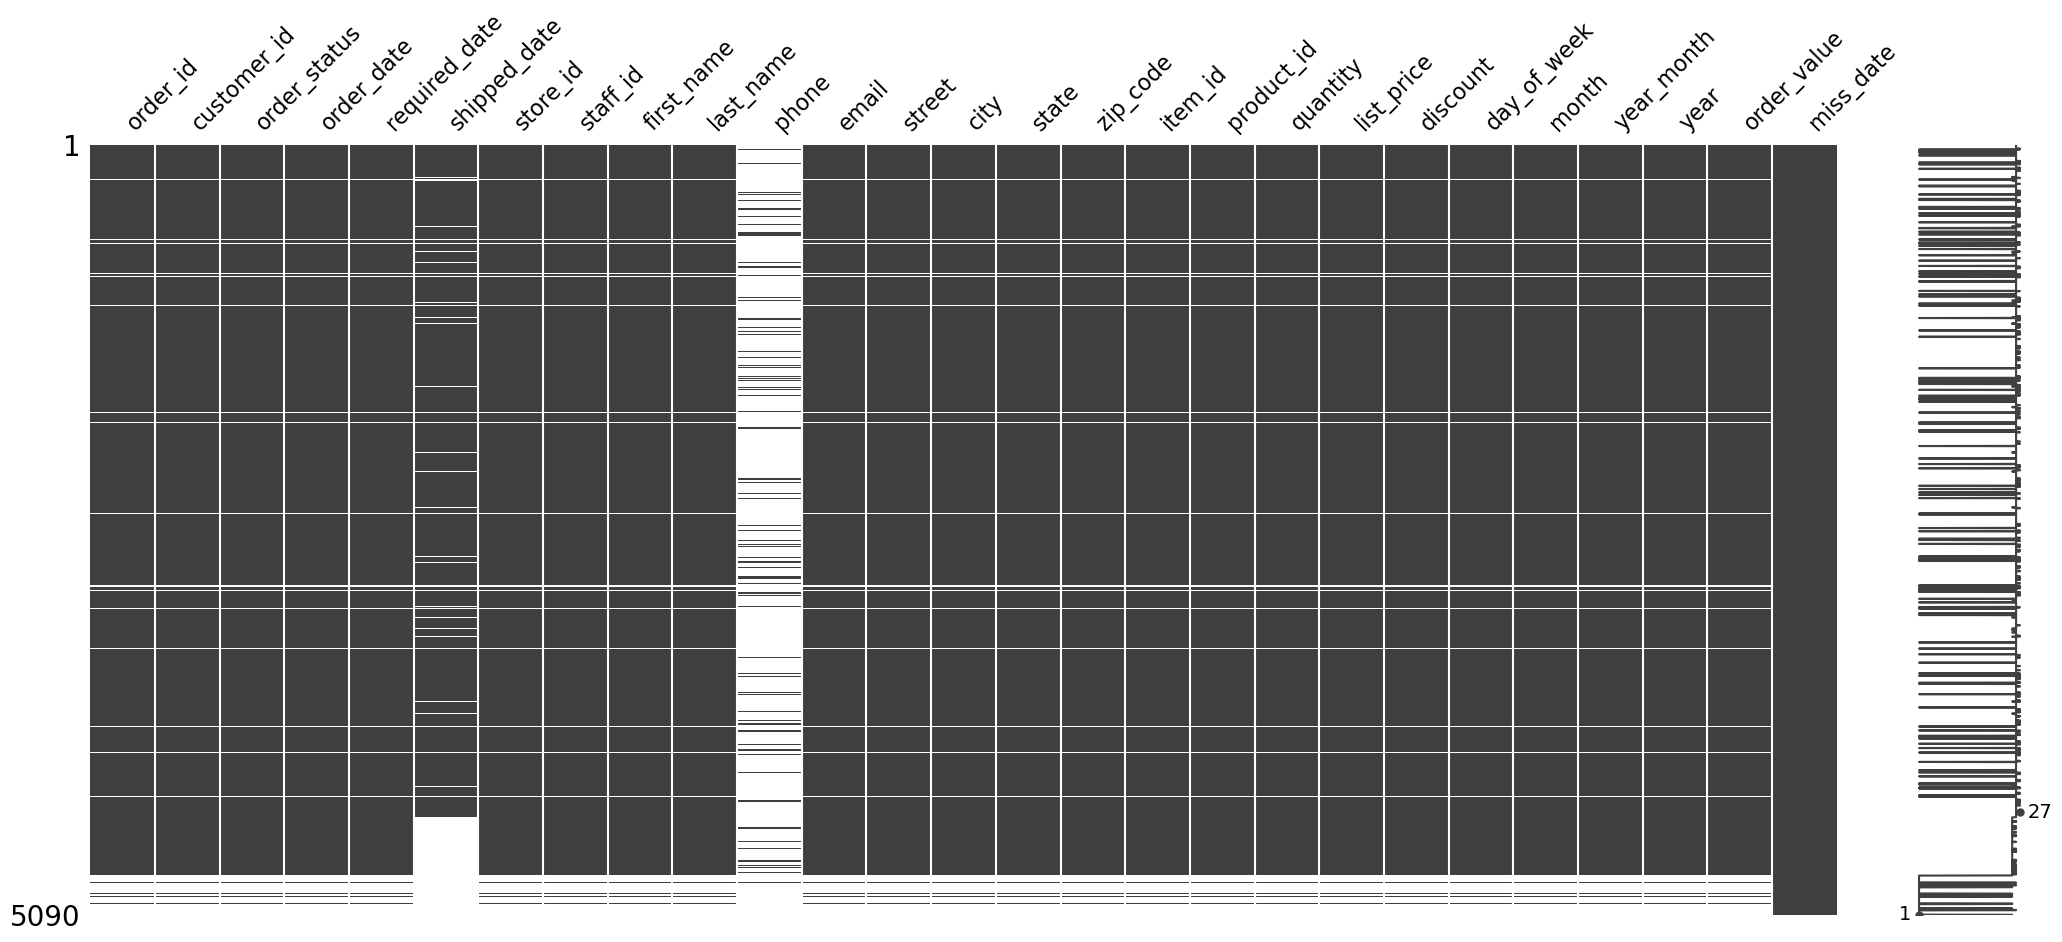

In [102]:
df_miss_day=pd.DataFrame()
df_miss_day['miss_date']=np.arange(df['order_date'].min(),
                                     df['order_date'].max()+(np.datetime64('2020-03-04')-np.datetime64('2020-03-03')),
                                    np.datetime64('2020-03-04')-np.datetime64('2020-03-03'))

df_missdays_null = df.merge(df_miss_day, how='outer', left_on='order_date', right_on='miss_date').sort_values(by='miss_date')

msno.matrix(df_missdays_null)

<Axes: >

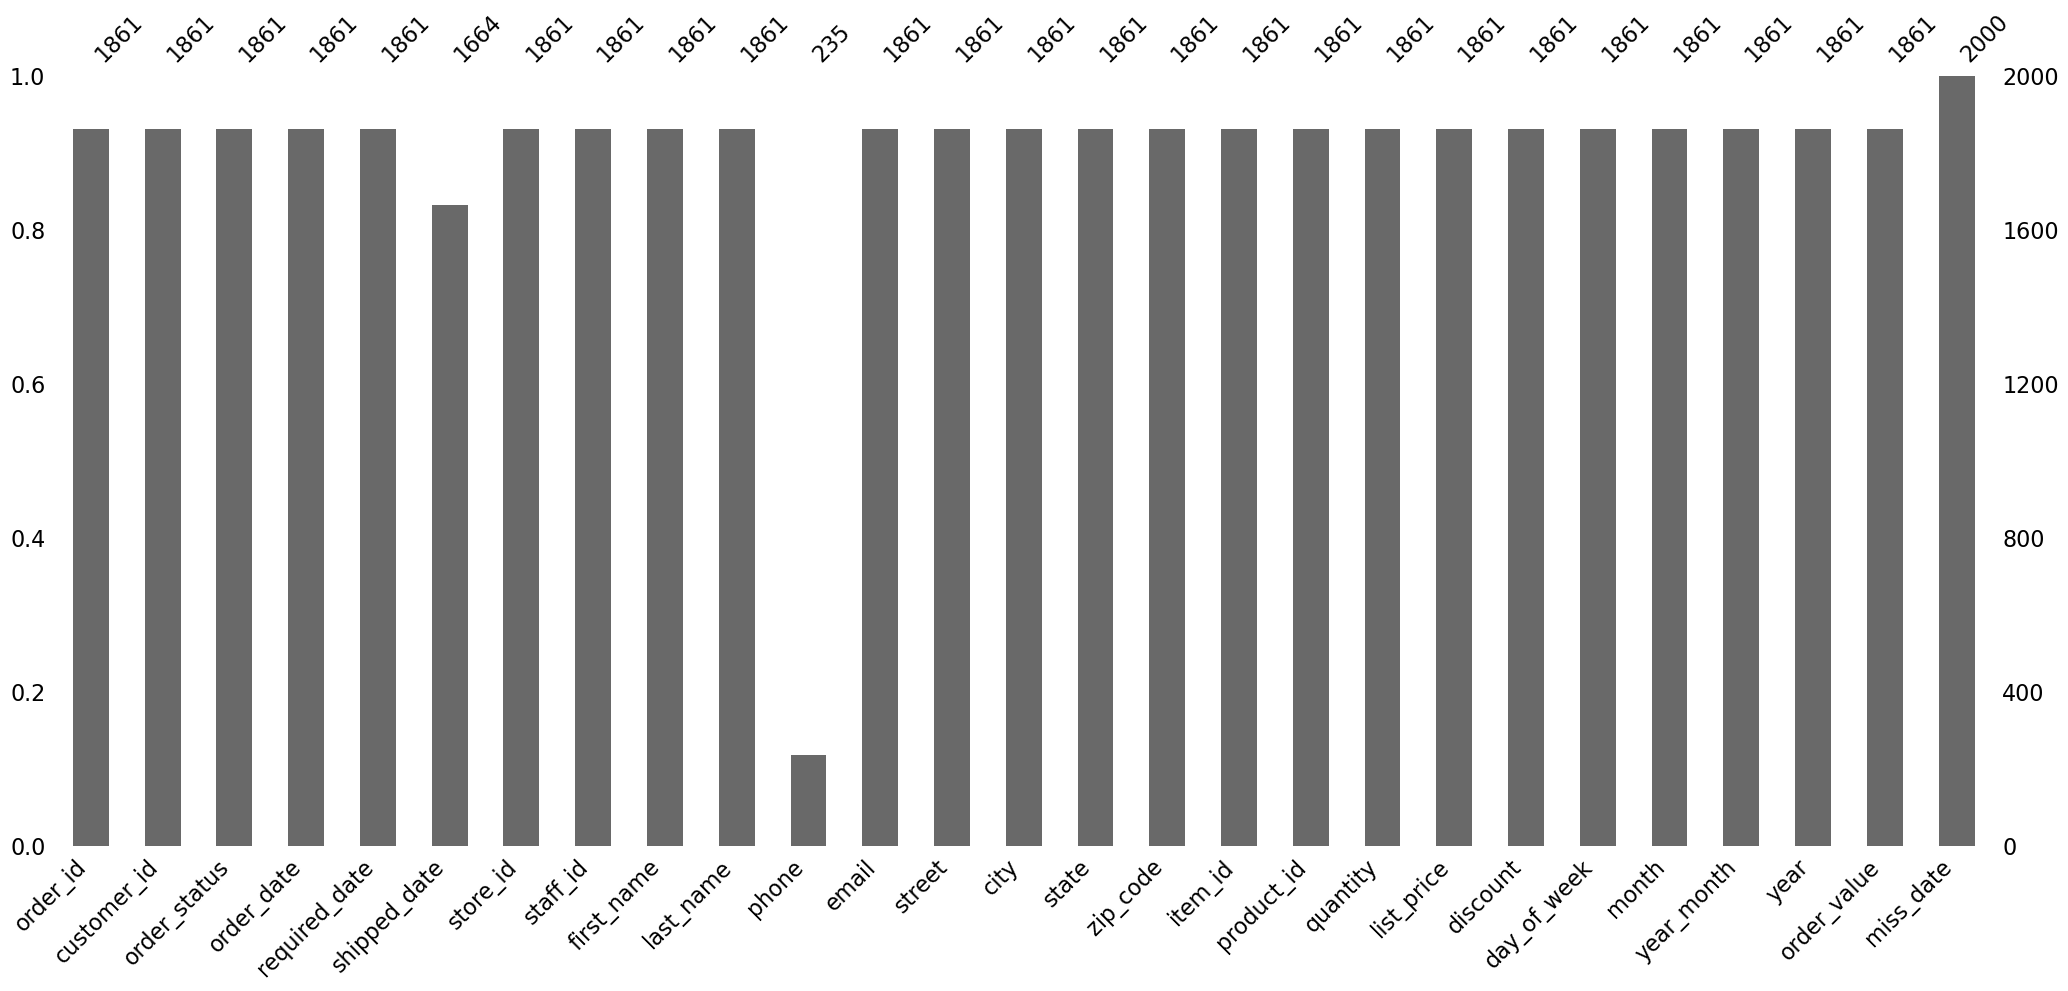

In [96]:
msno.bar(df_missdays_null.sample(2000))

<Axes: >

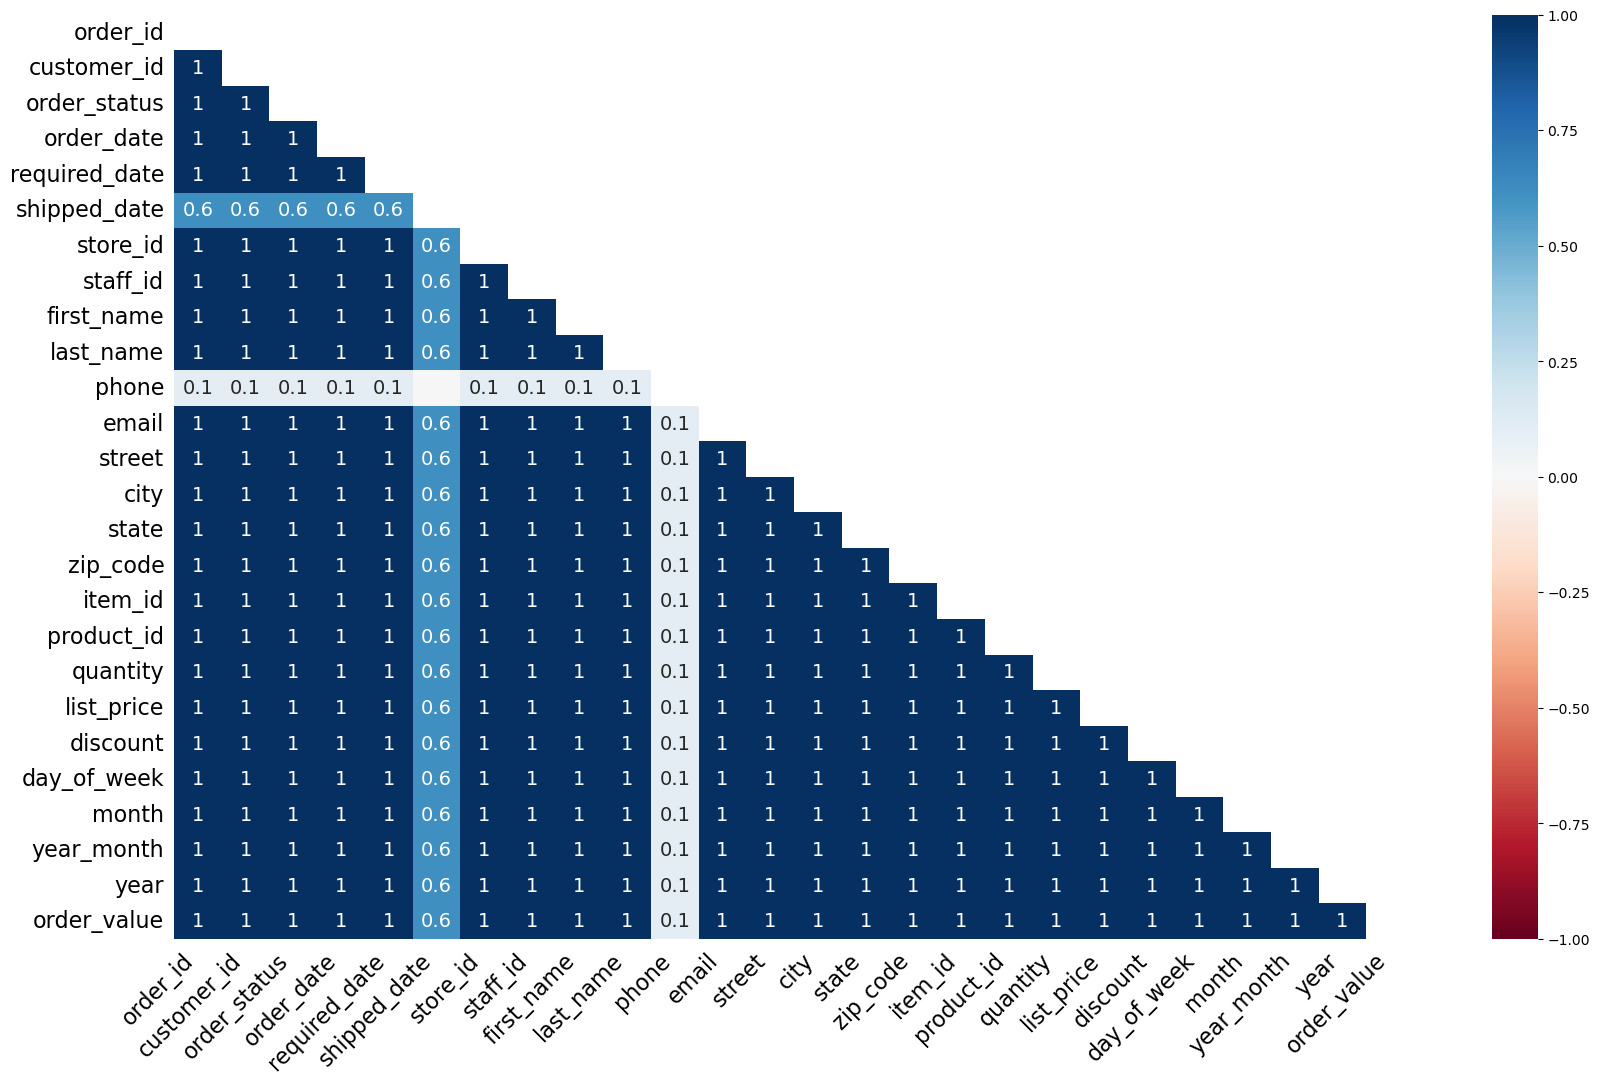

In [104]:
msno.heatmap(df_missdays_null)

<Axes: >

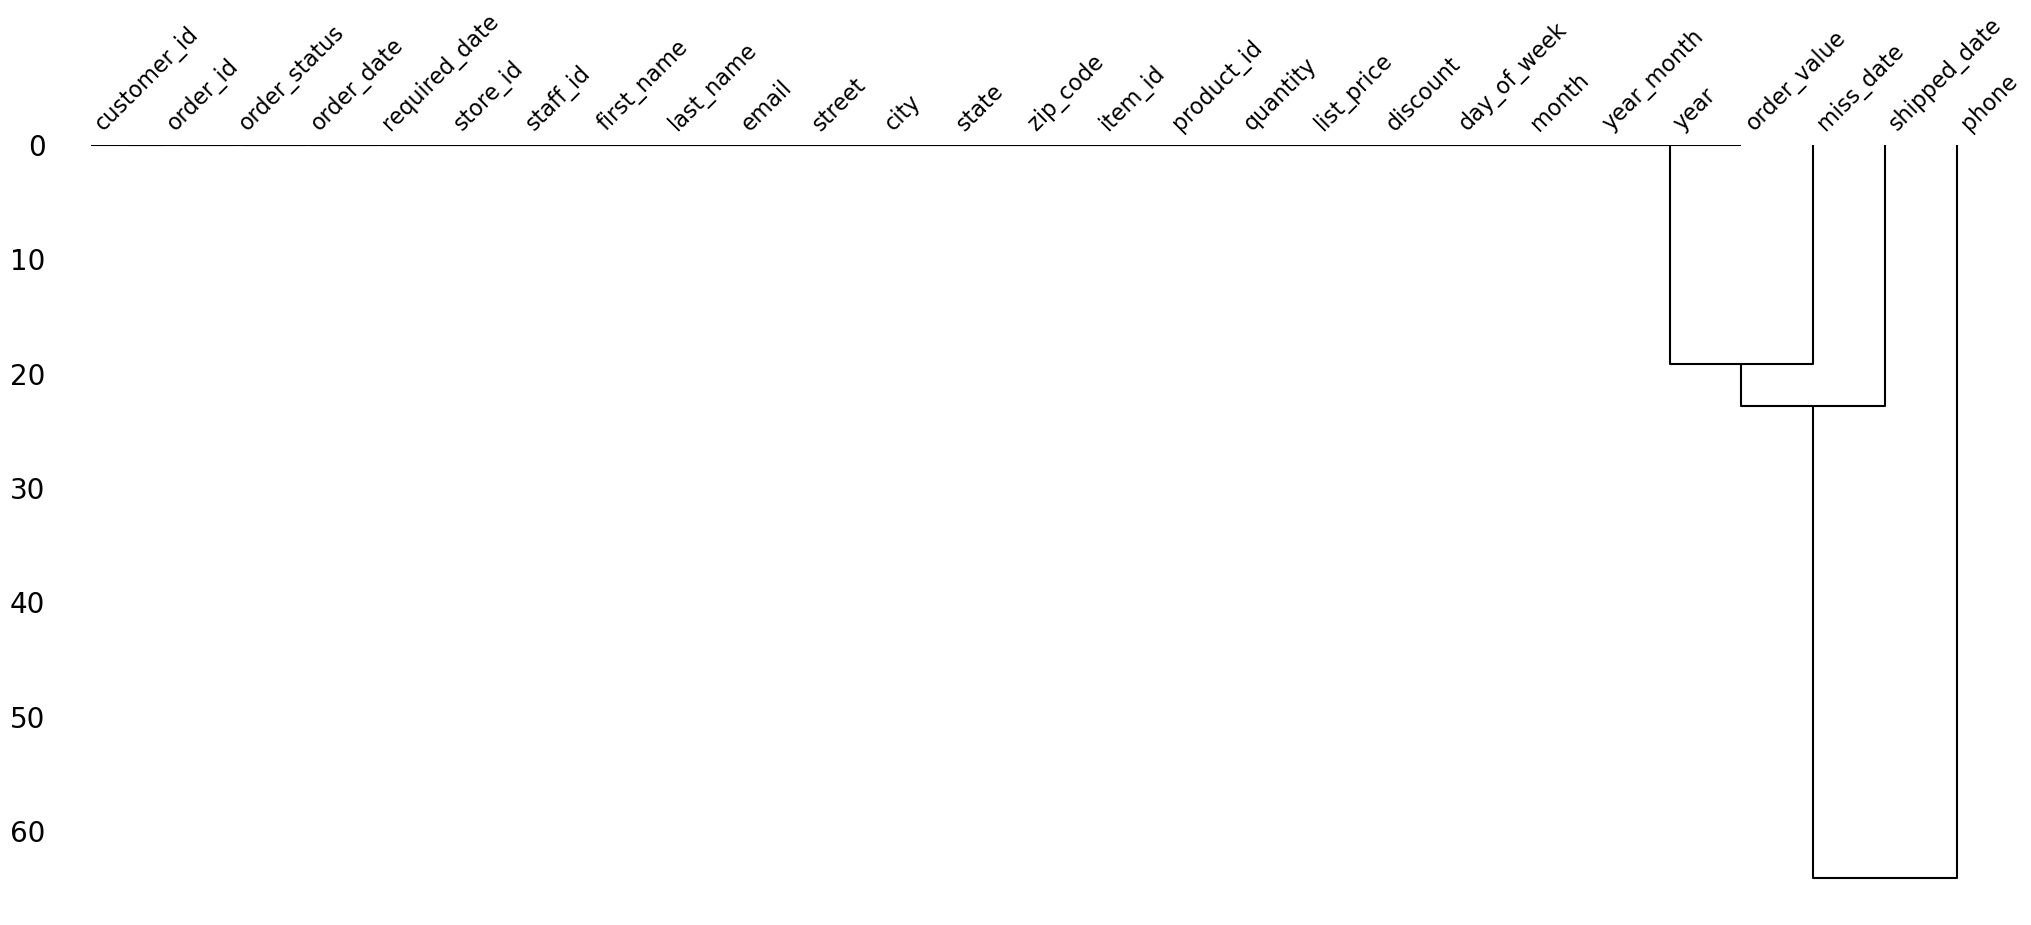

In [106]:
msno.dendrogram(df_missdays_null)

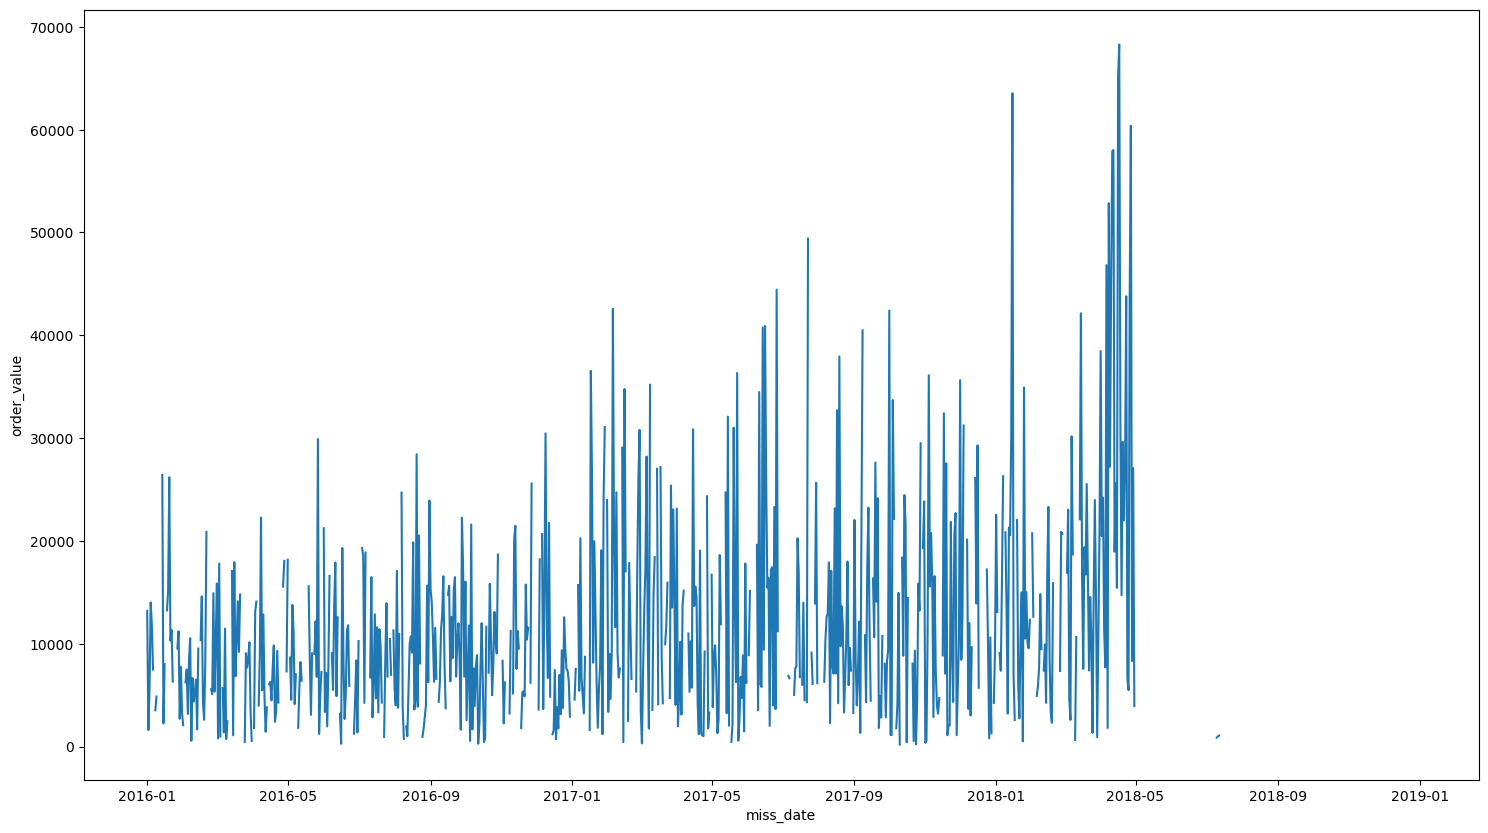

In [110]:
df_missdays_null_grouped = df_missdays_null.groupby('miss_date').agg({'order_value':'sum'}).reset_index()
df_missdays_null_grouped['order_value'] = df_missdays_null_grouped['order_value'].apply(lambda x: np.nan if x==0 else x)

import matplotlib.pyplot as plt

plt.subplots(figsize=(18,10))
plt.plot(df_missdays_null_grouped['miss_date'],
        df_missdays_null_grouped['order_value'])
plt.ylabel('order_value')
plt.xlabel('miss_date')
plt.show()

In [112]:
df_missdays_null_grouped.loc[df_missdays_null_grouped['order_value'].isna()]

miss_date  order_value
6    2016-01-07          NaN
9    2016-01-10          NaN
10   2016-01-11          NaN
12   2016-01-13          NaN
16   2016-01-17          NaN
...         ...          ...
1087 2018-12-23          NaN
1088 2018-12-24          NaN
1089 2018-12-25          NaN
1090 2018-12-26          NaN
1091 2018-12-27          NaN

[368 rows x 2 columns]

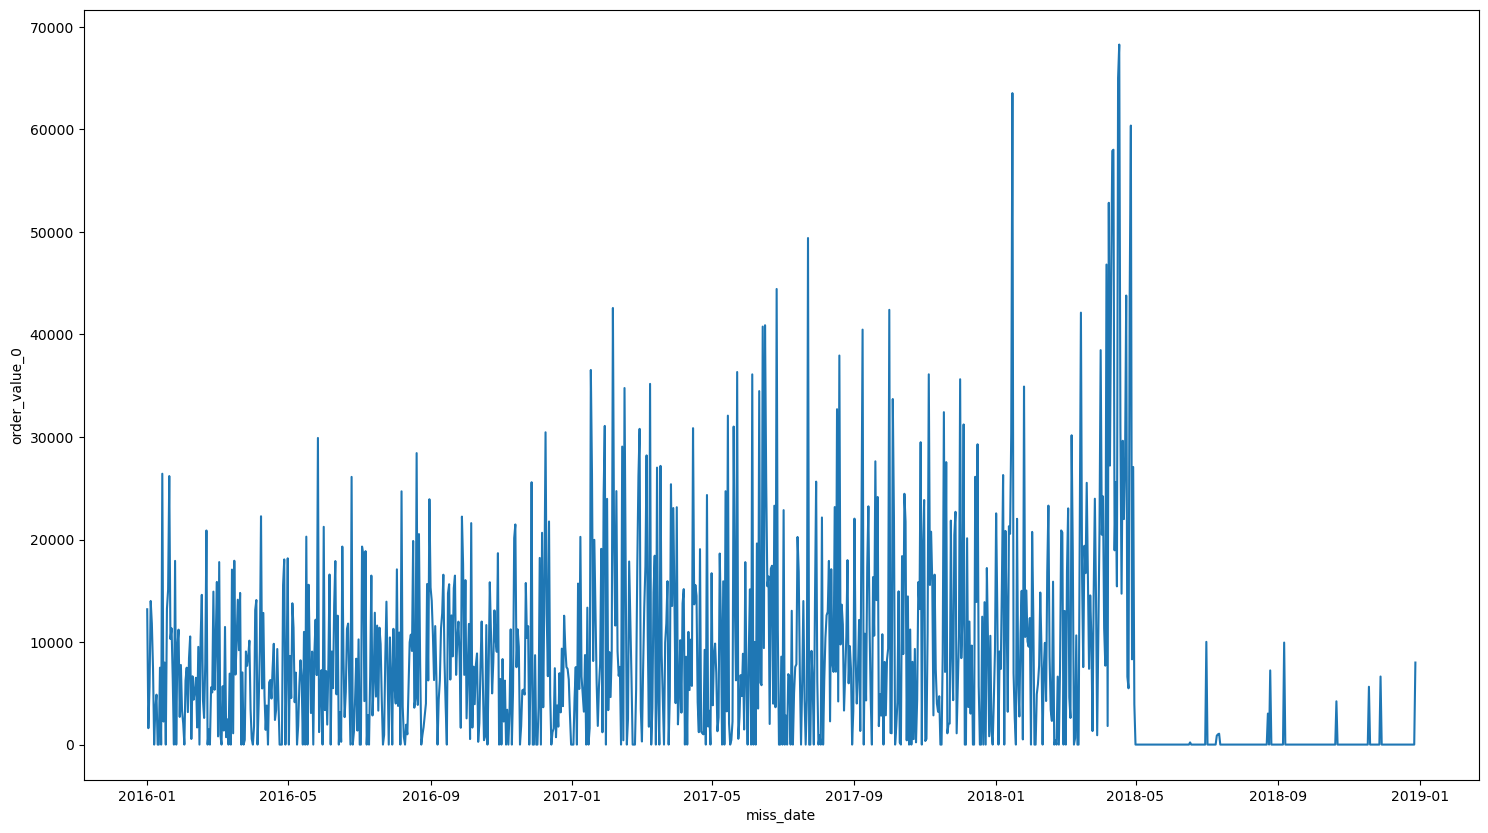

In [114]:
df_missdays_null_grouped['order_value_0'] = df_missdays_null_grouped['order_value'].fillna(0)


plt.subplots(figsize=(18,10))
plt.plot(df_missdays_null_grouped['miss_date'],
        df_missdays_null_grouped['order_value_0'])
plt.ylabel('order_value_0')
plt.xlabel('miss_date')
plt.show()

In [116]:
from sklearn.impute import SimpleImputer

In [ ]:
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
df_missdays_null_grouped['quantity_mean'] = imp_mean.fit_transform(np.array(df_missdays_null_grouped['quantity']).reshape(-1, 1)) 

In [ ]:
from sklearn.impute import SimpleImputer

imp_mean = SimpleImputer(strategy='mean')
df_missdays_null_grouped['order_value_mean'] = imp_mean.fit_transform(df_missdays_null_grouped[['order_value']])

imp_median = SimpleImputer(strategy='median')
df_missdays_null_grouped['order_value_median'] = imp_median.fit_transform(df_missdays_null_grouped[['order_value']])

imp_most_frequent = SimpleImputer(strategy='most_frequent')
df_missdays_null_grouped['order_value_most_freq'] = imp_most_frequent.fit_transform(df_missdays_null_grouped[['order_value']])

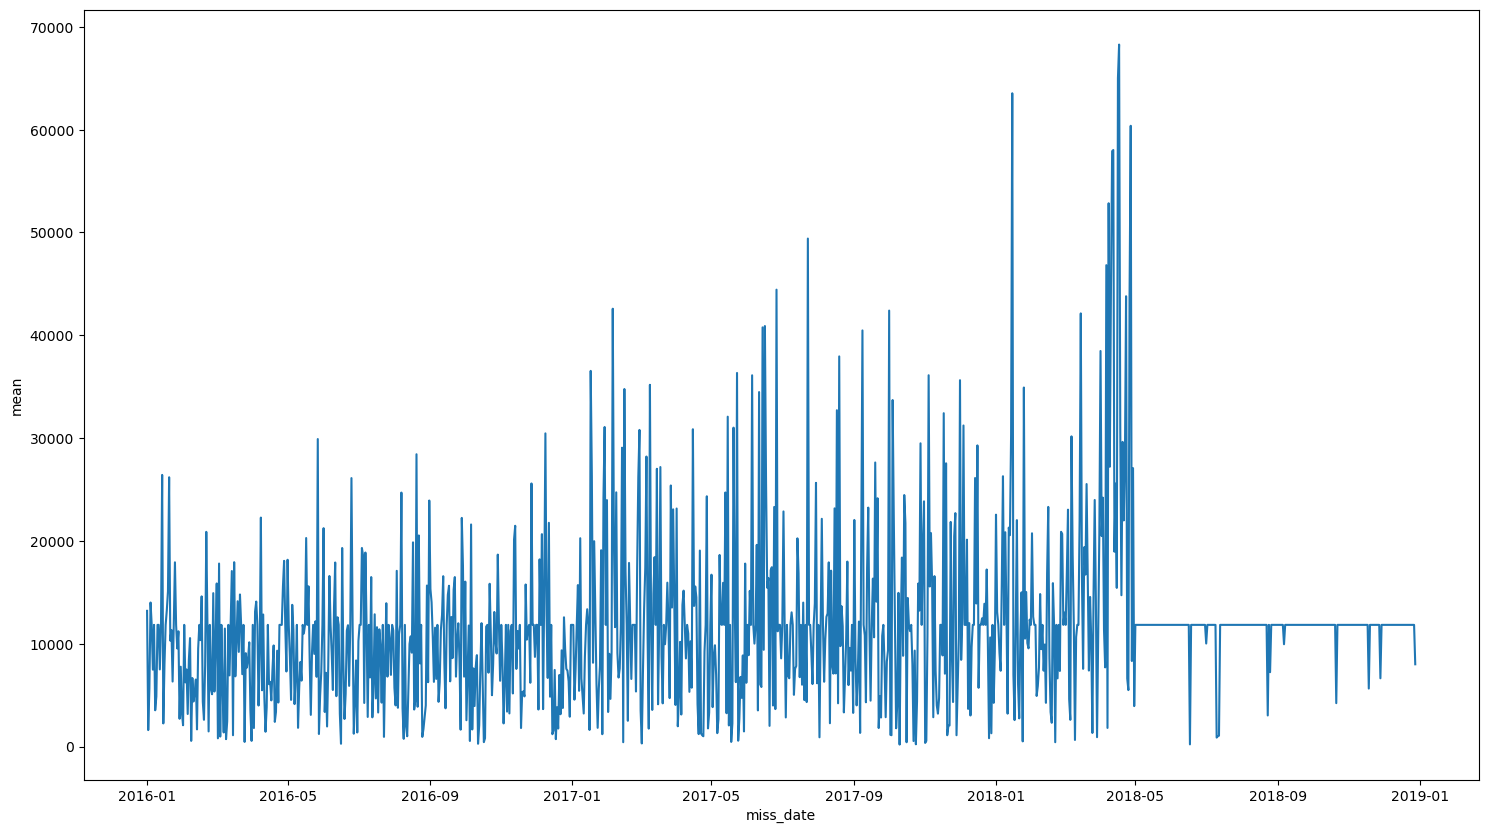

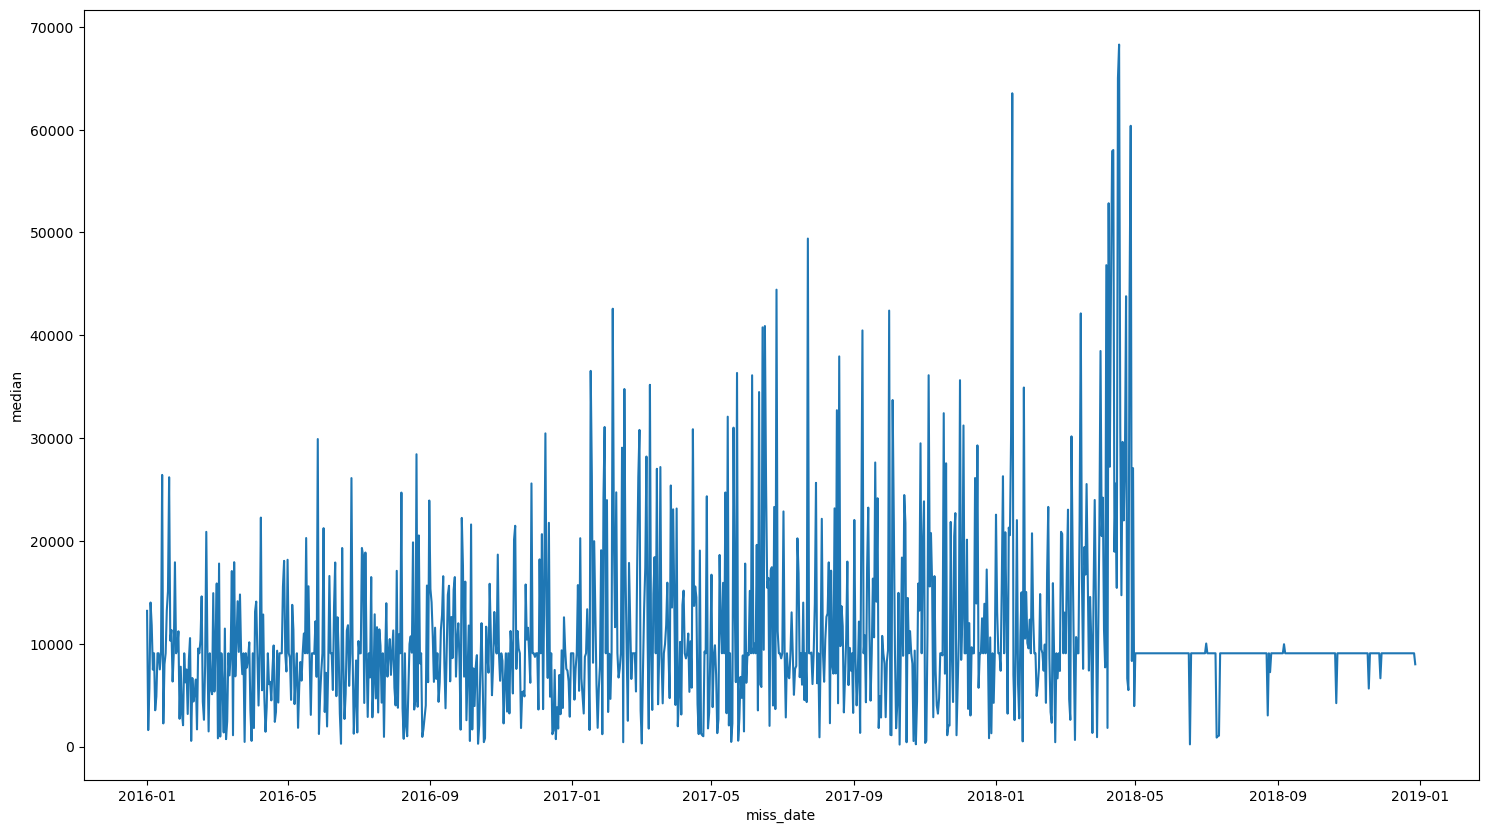

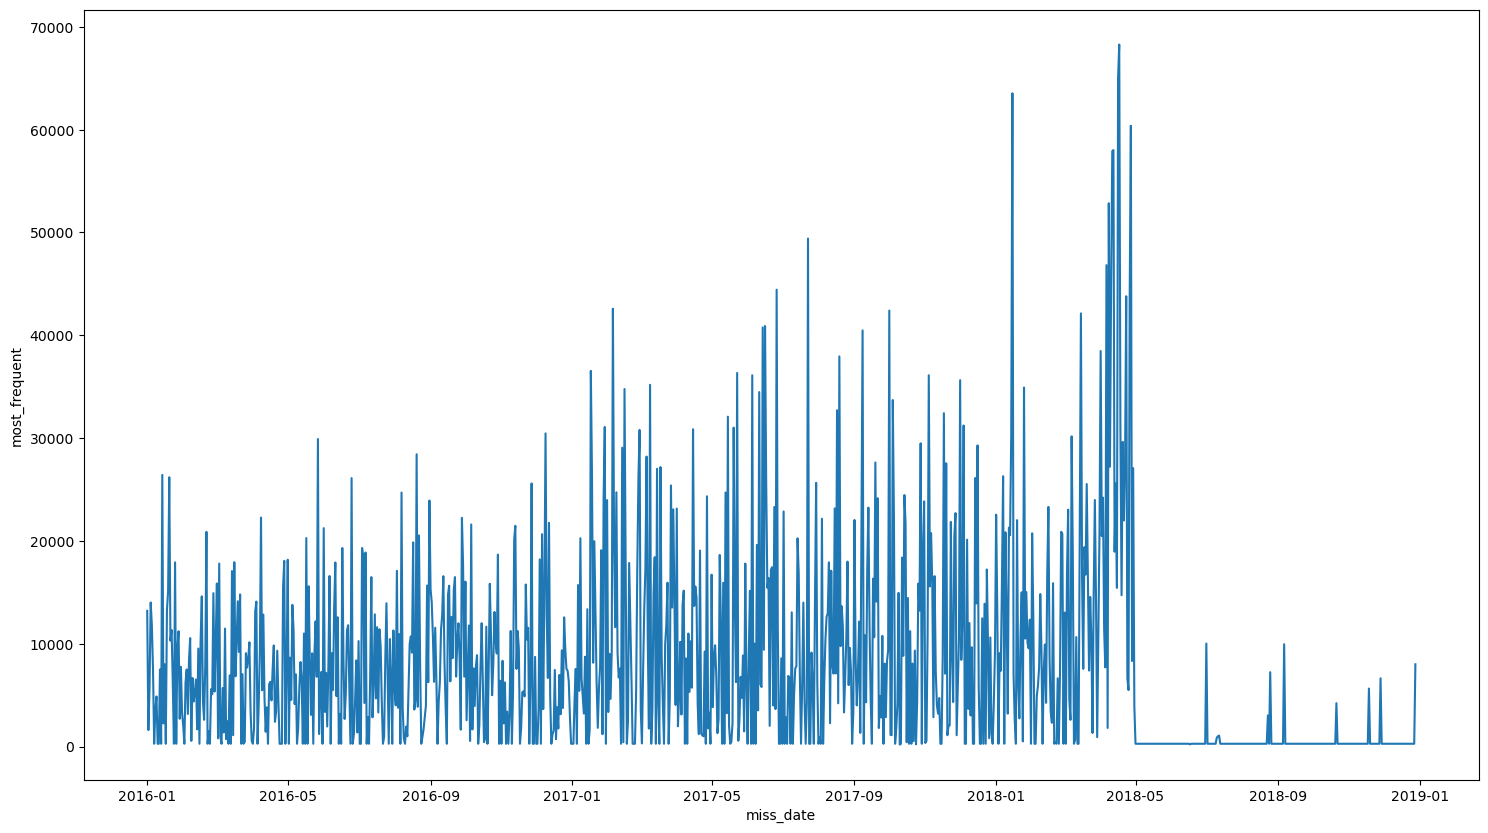

In [120]:
plt.subplots(figsize=(18,10))
plt.plot(df_missdays_null_grouped['miss_date'],
        df_missdays_null_grouped['order_value_mean'])
plt.ylabel('mean')
plt.xlabel('miss_date')
plt.show()

plt.subplots(figsize=(18,10))
plt.plot(df_missdays_null_grouped['miss_date'],
        df_missdays_null_grouped['order_value_median'])
plt.ylabel('median')
plt.xlabel('miss_date')
plt.show()

plt.subplots(figsize=(18,10))
plt.plot(df_missdays_null_grouped['miss_date'],
        df_missdays_null_grouped['order_value_most_freq'])
plt.ylabel('most_frequent')
plt.xlabel('miss_date')
plt.show()

In [ ]:
from sklearn.impute import KNNImputer

knn_imputer = KNNImputer(n_neighbors=3)
df_missdays_null_grouped['order_value_knn'] = knn_imputer.fit_transform(df_missdays_null_grouped[['order_value']])

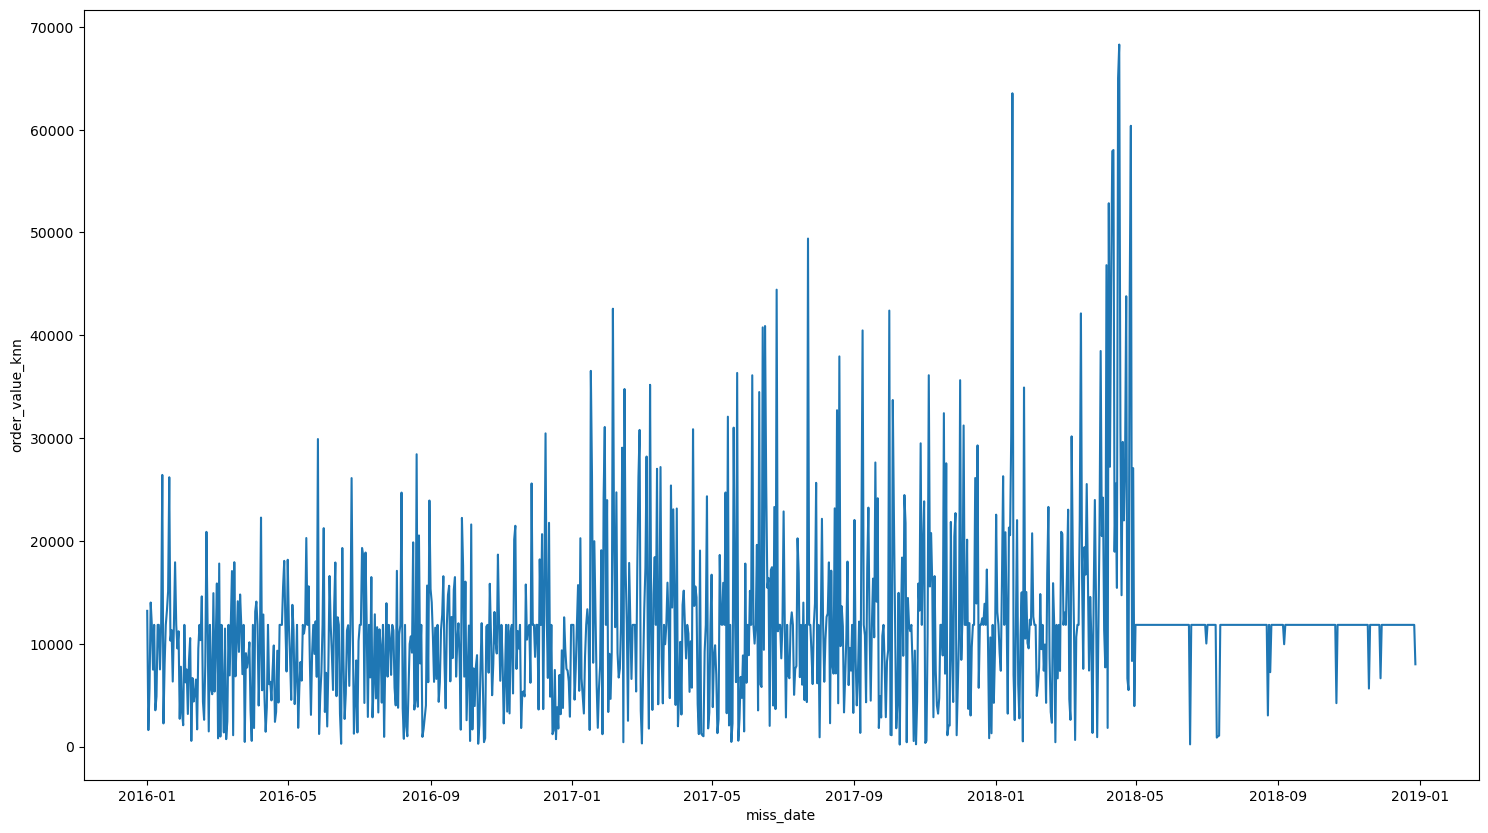

In [124]:
plt.subplots(figsize=(18,10))
plt.plot(df_missdays_null_grouped['miss_date'],
        df_missdays_null_grouped['order_value_knn'])
plt.ylabel('order_value_knn')
plt.xlabel('miss_date')
plt.show()

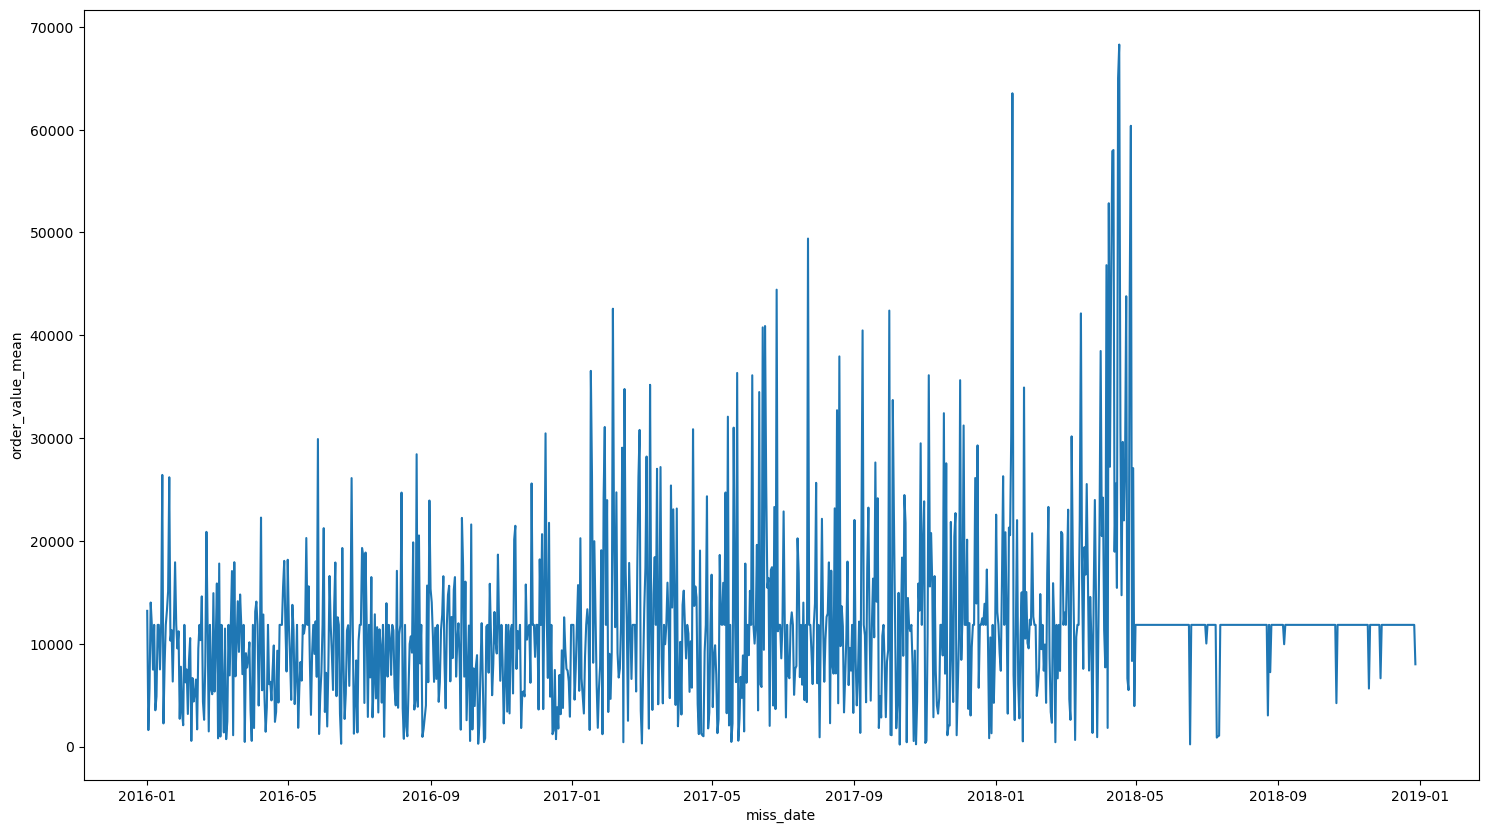

In [126]:
plt.subplots(figsize=(18,10))
plt.plot(df_missdays_null_grouped['miss_date'],
        df_missdays_null_grouped['order_value_mean'])
plt.ylabel('order_value_mean')
plt.xlabel('miss_date')
plt.show()

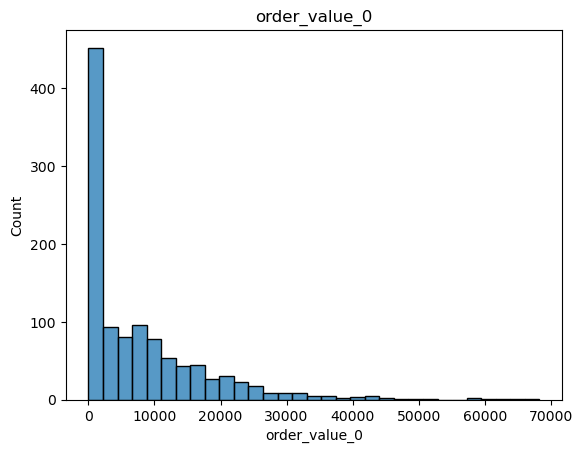

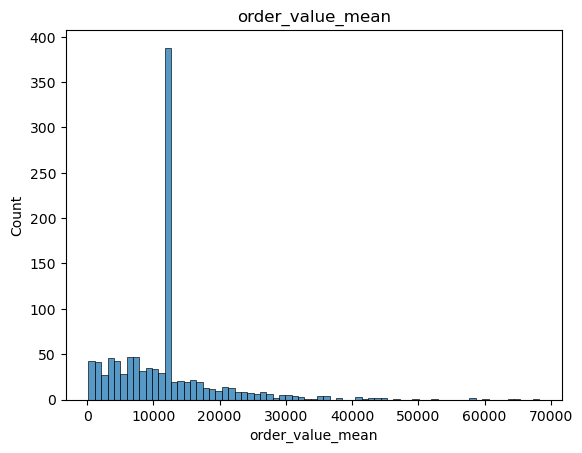

In [128]:
sns.histplot(df_missdays_null_grouped,
            x='order_value_0').set(title='order_value_0')
plt.show()

sns.histplot(df_missdays_null_grouped,
            x='order_value_mean').set(title='order_value_mean')
plt.show()

## 5. Outlier Detection

Outliers can significantly affect statistical models and machine learning algorithms.

In this section, we:
- Use histograms and scatterplots
- Inspect daily aggregated values
- Detect extreme spikes

Potential approaches for numeric outliers:
- IQR method
- Z-score
- Robust scaling

For categorical variables:
- Rare category detection
- Frequency threshold filtering

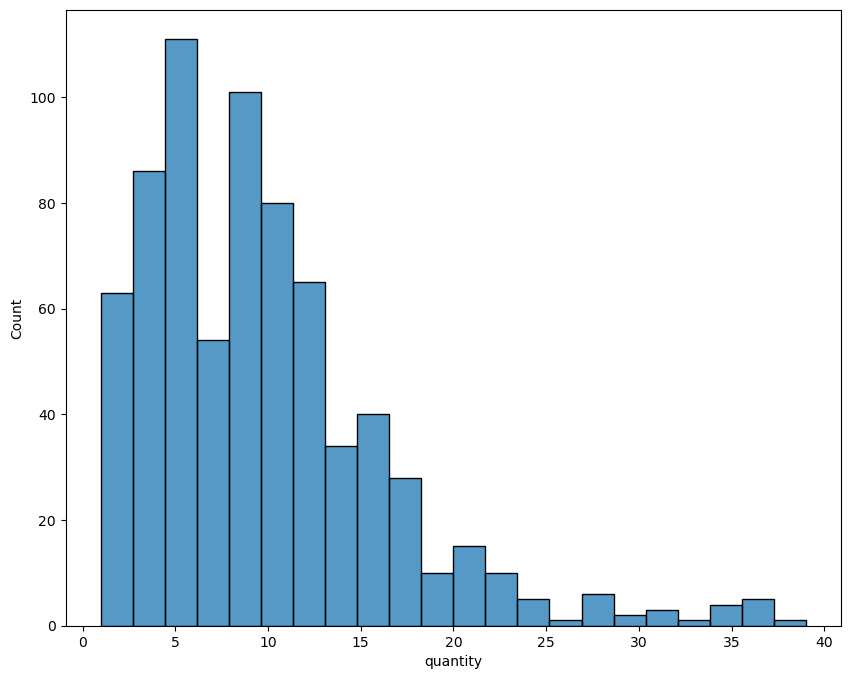

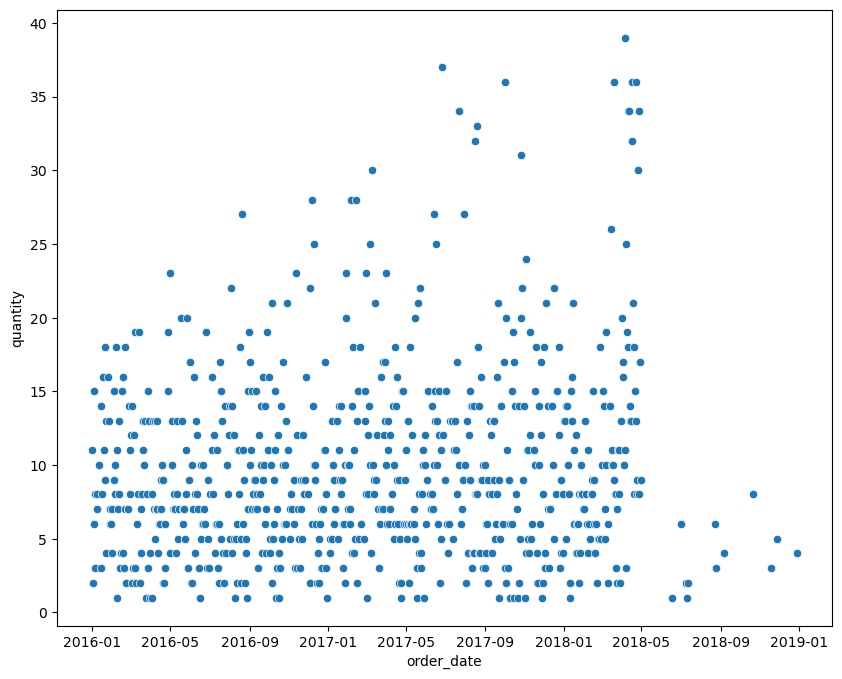

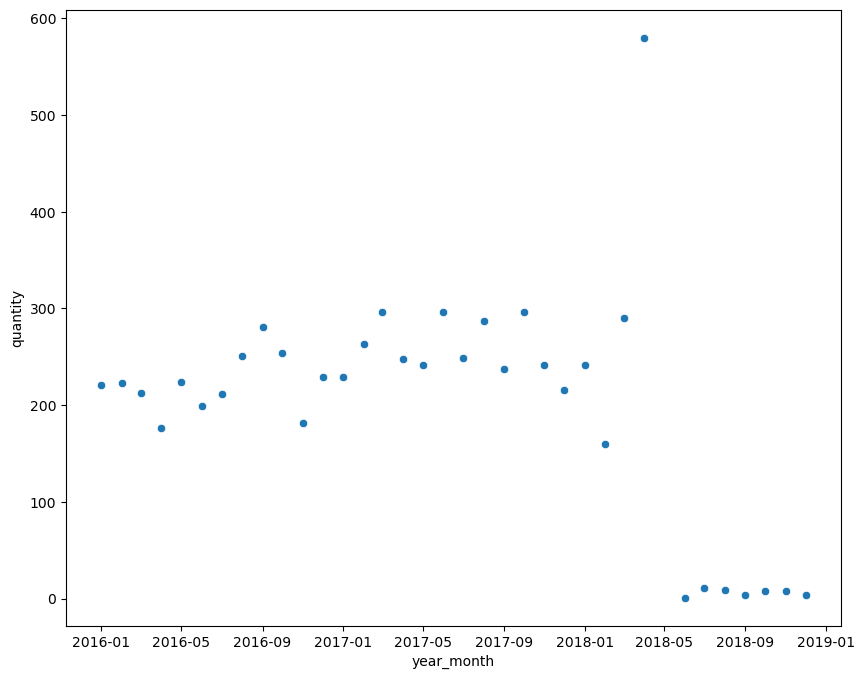

In [130]:
import seaborn as sns

plt.subplots(figsize=(10,8))
sns.histplot(df.groupby(['order_date']).agg({'quantity':'sum'}).reset_index(),
            x='quantity')
plt.show()

plt.subplots(figsize=(10,8))
sns.scatterplot(df.groupby(['order_date']).agg({'quantity':'sum'}).reset_index(),
            y='quantity',
               x='order_date')
plt.show()

plt.subplots(figsize=(10,8))
df['year_month']=df['order_date'].apply(lambda x: str(x.year)+'-'+str(x.month))
df['year_month']=pd.to_datetime(df['year_month'], format='%Y-%m')
sns.scatterplot(df.groupby(['year_month']).agg({'quantity':'sum'}).reset_index(),
            y='quantity',
               x='year_month')
plt.show()

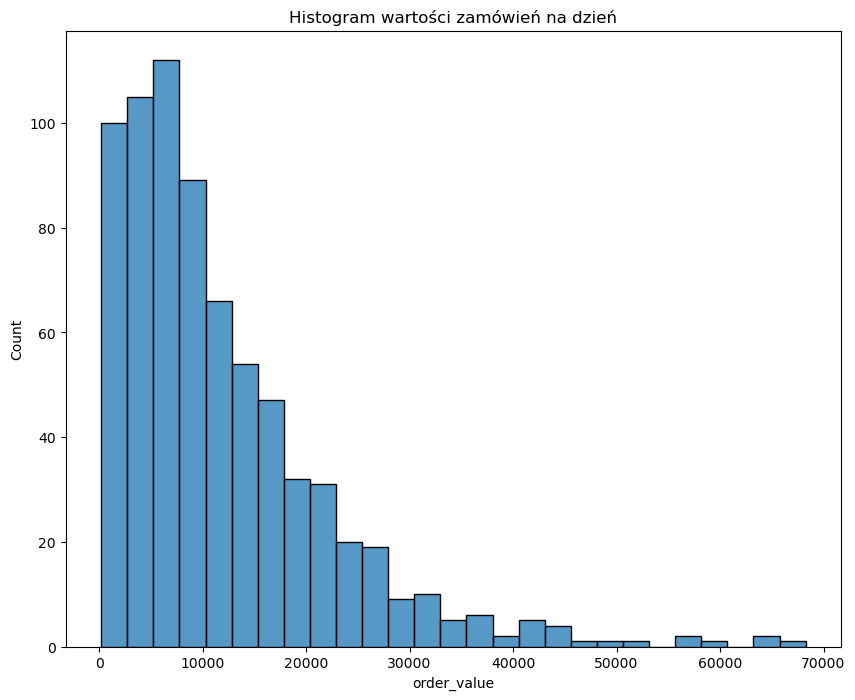

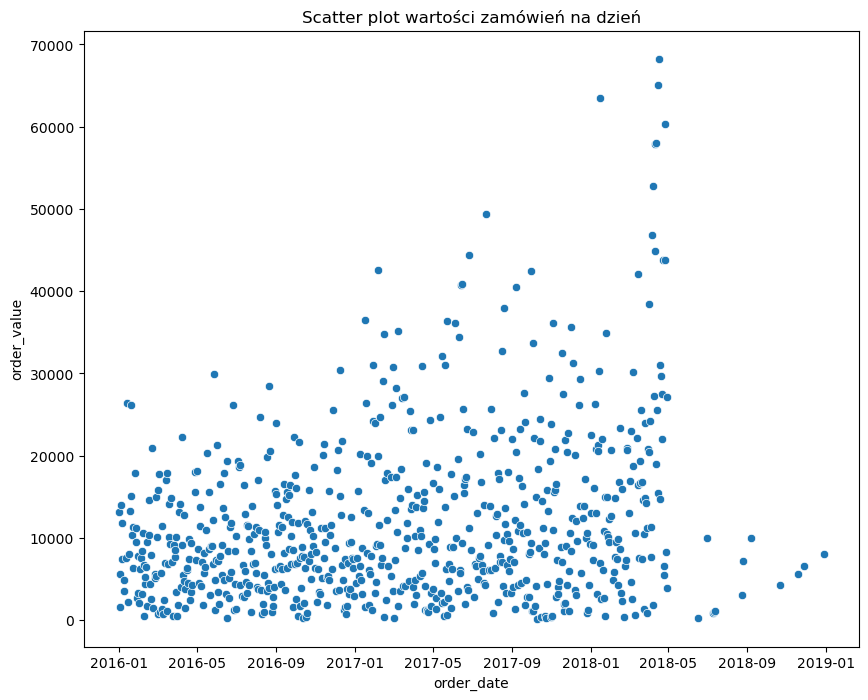

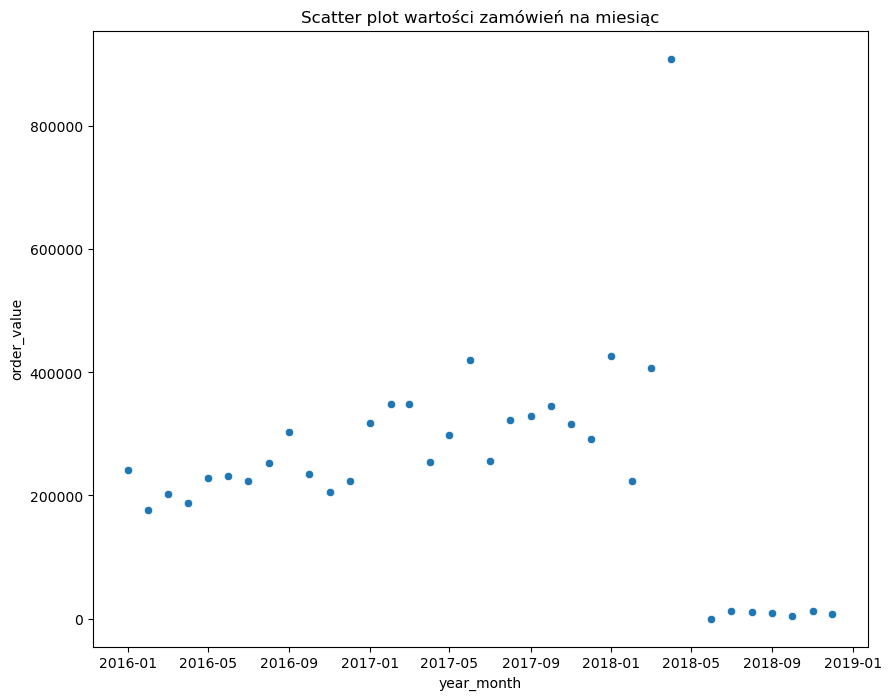

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

df_grouped_order_value = df.groupby(['order_date']).agg({'order_value': 'sum'}).reset_index()

plt.subplots(figsize=(10, 8))
sns.histplot(df_grouped_order_value, x='order_value')
plt.title("Histogram wartości zamówień na dzień")
plt.show()

plt.subplots(figsize=(10, 8))
sns.scatterplot(data=df_grouped_order_value, y='order_value', x='order_date')
plt.title("Scatter plot wartości zamówień na dzień")
plt.show()

df['year_month'] = df['order_date'].apply(lambda x: str(x.year) + '-' + str(x.month))
df['year_month'] = pd.to_datetime(df['year_month'], format='%Y-%m')

df_grouped_month = df.groupby(['year_month']).agg({'order_value': 'sum'}).reset_index()

plt.subplots(figsize=(10, 8))
sns.scatterplot(data=df_grouped_month, y='order_value', x='year_month')
plt.title("Scatter plot wartości zamówień na miesiąc")
plt.show()

## 6. Duplicate Detection

Duplicate records may bias analysis results.

We check for:
- Exact duplicates
- Aggregated duplicates
- Duplicate patterns after grouping

Removing duplicates ensures data integrity before modeling.

In [54]:
df3 = df.groupby(['shipped_date']).agg({'order_value': 'sum'}).reset_index()

In [64]:
df[df.duplicated()]

Empty DataFrame
Columns: [order_id, customer_id, order_status, order_date, required_date, shipped_date, store_id, staff_id, first_name, last_name, phone, email, street, city, state, zip_code, item_id, product_id, quantity, list_price, discount, year, order_value, day_of_week, month, year_month]
Index: []

[0 rows x 26 columns]

In [ ]:
df3 = df.groupby(['shipped_date']).agg({'quantity': 'sum'}).reset_index()

df3_duplicates = df3[df3.duplicated()]

print(df3_duplicates)

Empty DataFrame
Columns: [shipped_date, quantity]
Index: []


# 7. Conclusions

Key findings:

- Sales data shows seasonal and weekly patterns.
- Distribution of quantities is right-skewed.
- Log transformation improves normality.
- Missing values can be handled using multiple strategies depending on business context.
- Outliers exist and should be treated carefully before modeling.

This dataset is now prepared for further steps such as:
- Predictive modeling
- Time-series forecasting
- Customer behavior analysis
- Recommender systems